## **DACON 공간정보 탐색적 데이터 분석 경진대회**

- 2020년 가장 뜨거웠던 주제였던 코로나와 부동산. 코로나로 지급된 재난지원금이 제주도에는 어떠한 영향이 있었는지,  
  어떻게 하면 다음번에는 어떤 식으로 소비를 독려하면 좋을지, 그리고 제주의 부동산 시장 변화와 이를 소비와 연관지어 분석해보려 합니다

> #### 제공된 데이터의 컬럼별 정보
컬럼명/ 정보
YM : 기준년월  
SIDO : 지역대분류명  
SIGUNGU : 지역중분류명  
FranClass : 소상공인구분  
Type : 업종명  
Time : 시간대  
TotalSpent : 총사용금액  
DisSpent : 재난지원금 사용금액  
NumOfSpent : 총 이용건수  
NumOfDisSpent : 총 재난지원금 이용건수  
POINT_X, POINT_Y : X,Y 좌표

### 라이브러리 / 데이터 로딩 및 전처리

In [1]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
from matplotlib import font_manager, rc
from datetime import datetime

import plotly.figure_factory as ff
from pyproj import Proj, Transformer
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# korean setting
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [3]:
# 시작전 데이터 로딩
# df7의 X,Y 컬럼은 불필요 함으로 삭제
for n in range(5, 9):
    globals()["df" + str(n)] = pd.read_csv("KRI-DAC_Jeju_data" + str(n)+".txt", sep=',')

df7.drop(columns = ['X', 'Y'], inplace = True)

#### 업종에 대한 대분류 분류

In [4]:
기관_기업 = ['초중고교육기관', '공공요금', '조세서비스'] #공공기업/기관

음식점_식품 = ['일반한식', '단란주점', '주점','스넥', '서양음식', '일식회집', '기타음료식품', '중국음식', '유흥주점',
      '인삼제품', '홍삼제품', '농협하나로클럽',  '기타건강식', '유류판매', '농축협직영매장', '구내매점', '칵테일바', '정육점',
         '주류판매점', '제과점', '미곡상'] 

패션_뷰티 = ['가방', '맞춤복점', '미용재료', '캐쥬얼의류', '양품점', '시계', '안경', '단체복', '아동의류', '신발', '기타의류', 
        '내의판매점', '민예공예품', '스포츠의류', '기타잡화', '악세사리', '정장', '피부미용실', '화장품']

취미_오락 = ['노래방', '당구장', '문화취미기타', '기타서적문구', 'DVD음반테이프판매', '화랑', '컴퓨터학원', '전문서적', '화방표구점',
        '악기점', '예체능학원', '학원(회원제형태)',  '외국어학원', '기능학원', '기타교육',  '영화관', '헬스크럽', '독서실',
        '애완동물', '볼링장']

_1차산업 = ['기타농업관련']

_2차산업 = ['기타직물', '기타광학품', '수입자동차', '기타비영리유통', '귀금속', '사무기기', '과학기자재', '윤활유전문판매', '통신기기',
        '한약방', '카메라', '정수기', 'CATV', '기타사무용', '이륜차판매', '중고자동차', '철제가구', '일반가구', 
         '카페트커텐천막', '컴퓨터', '냉열기기', '소프트웨어', '유리', '자동차시트타이어', '기타전기제품', 
        '기타운송', '연쇄점',  '옷감직물',  '조명기구', '기타연료', '자동차부품', '기타가구', '비료농약사료종자', '농기계', '보일러펌프',
        '페인트',  '건축요업품', '기타건축자재', '목재석재철물', '기계공구',  '의료용품', '기타유통업', '화물운송', 'LPG', '제약회사']

기타서비스업 = ['출판인쇄물', '서적출판(회원제형태)', '정보서비스', '사무서비스(회원제형태)', '기타자동차서비스', '사무통신기기수리', '법률회계서비스', '손해보험',
         '신변잡화수리','기타보험', '중장비수리', '부동산중개임대', '견인서비스', '가정용품수리', '카인테리어', '기타수리서비스',
         '인테리어', '기타용역서비스', '위탁급식업',  '기타의료기관및기기', '가례서비스', '종합용역', '보관창고업', '부동산분양', 
         '기타대인서비스', '자동차정비', '사무서비스']

레져 = ['기타레져업', '골프경기장', '종합레져타운', '수영장', '레져업소(회원제형태)', '레져용품수리', '골프연습장', '스포츠레져용품', 
      '골프용품', '테니스장']

생활 = ['일반서적', '동물병원','산후조리원','편의점', '슈퍼마켓', '농축수산품', '유아원', '세탁소', '주차장', '주유소', '골동품점', '대학등록금','정기간행물',
      '제화점', '건강식품(회원제형태)', '치과병원', '기타교통수단', '성인용품점', '치과의원', '병원', '주방용구', '완구점', '건강진단',
     '한의원', '주방용식기', '문구용품', '이용원','가전제품', '택시', '세차장','인터넷종합Mall', '침구수예점', '사진관', '미용원',
     '인터넷Mall', '대형할인점', '의원', '사우나', '종합병원', '약국', '안마스포츠마사지', '보습학원', '학습지교육']

관광= ['기타숙박업', '콘도', '여객선', '수족관', '티켓', '면세점',  '렌트카', '기념품점','1급호텔', '관광여행', '항공사', '2급호텔', 
    '화원',  '특급호텔']

기타 = [ '기타업종', '상품권', '기타회원제형태업소']

In [5]:
dae_list = ['기관_기업', '패션_뷰티', '음식점_식품', '취미_오락', '1차산업', '2차산업', '기타서비스업', '레져', '생활', '관광', '기타']

In [6]:
# 데이터 별 대분류 칼럼 추가 


def dae_type(x):
    for num, i in enumerate([기관_기업, 패션_뷰티, 음식점_식품, 취미_오락, _1차산업, _2차산업, 기타서비스업, 레져, 생활, 관광, 기타]):
        if x in i:
            return dae_list[num]
    
    return None

df5['dae_type'] = df5['Type'].apply(dae_type)
df6['dae_type'] = df6['Type'].apply(dae_type)
df7['dae_type'] = df7['Type'].apply(dae_type)
df8['dae_type'] = df8['Type'].apply(dae_type)

In [7]:
#### 이후 대분류 포함 데이터 로딩용
df5_cat = pd.read_csv('df5.csv')
df6_cat = pd.read_csv('df6.csv')
df7_cat = pd.read_csv('df7.csv')
df8_cat = pd.read_csv('df8.csv')

In [8]:
df_all = pd.concat([df5_cat,df6_cat,df7_cat,df8_cat])

In [9]:
def set_time_category(time_str):
    
    if time_str == "x시":
        return "무승인거래"
    else:
        time = int(time_str[:2])
    
    if time < 2:
        return "심야"
    elif time < 6:
        return "새벽"
    elif time < 11:
        return "오전"
    elif time < 15:
        return "점심"
    elif time < 18:
        return "오후"
    elif time < 22:
        return "저녁"
    else:
        return "심야"

def set_time_cat_order(time_cat):
    
    time_dict = {
                "새벽" : 0,
                "오전" : 1,
                "점심" : 2,
                "오후" : 3,
                "저녁" : 4,
                "심야" : 5,
                "무승인거래" : 6
                }
    
    return time_dict[time_cat]

df_all["Time_cat"] = df_all["Time"].apply(set_time_category)

**이용된 외부데이터**
- 도로교통부 실거래가 공개시스템 이용(http://rtdown.molit.go.kr/)  
  '19.12~'20.11월 까지의 제주도 아파트 매매 및 전세 거래 데이터

# [소비 분석] 5~8월 간 제주도의 소비 분석

##  ㅁ 배경
- 전국적으로 발급된 재난 지원금 이후에도, 제주도는 5월 1차 재난지원급이 발급 되었던것을 고려하여, 5~8월 간의 소비를  
  1) 업종별, 2) 시간별, 3) 장소별 분석하여 인사이트를 발굴하고 추후 재난지원금의 배포 방안을 토의해 보려함

In [10]:
df_agg = df_all.groupby(['YM', 'SIGUNGU']).agg({"TotalSpent":"sum", "DisSpent":"sum", "NumofSpent":"sum", "NumofDisSpent":"sum"}).reset_index()
df_agg

YM SIGUNGU    TotalSpent     DisSpent  NumofSpent  NumofDisSpent
0  202005    서귀포시   43133818669   5920539356     1313870         193500
1  202005     제주시  125553893530  18259555268     3837175         589269
2  202006    서귀포시   42917098989   2618650789     1322943         103982
3  202006     제주시  124061403275   7047698235     3862965         280360
4  202007    서귀포시   46850009281    400785511     1495032          16217
5  202007     제주시  132443575566    942772314     4251813          40146
6  202008    서귀포시   51576733826    150977596     1573657           5360
7  202008     제주시  133889477325    392677578     4260475          13300

In [11]:
sum_by_month= df_agg.groupby(['YM']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).reset_index()
sum_by_sigun=df_agg.groupby(['SIGUNGU']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).reset_index()
sum_by_time=df_all.groupby(['Time']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).reset_index()
sum_by_type=df_all.groupby(['dae_type']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).sort_values(by="TotalSpent").reset_index()

In [12]:
colors = px.colors.sequential.Plasma + px.colors.sequential.Oryel + px.colors.sequential.Aggrnyl + px.colors.sequential.Blues

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("월별 소비 합계(총 소비 & 재난지원금)", "시별 소비 합계", "시간별 소비 합계", "업종별 소비 합계(총 소비 & 재난지원금)"))

fig.add_trace(
    go.Bar(x=sum_by_month["YM"].astype(str), y=sum_by_month["TotalSpent"],
          marker=dict(color=colors)), 1, 1
)

fig.add_trace(
    go.Bar(x=sum_by_month["YM"].astype(str), y=sum_by_month["DisSpent"],
          marker=dict(color=colors)), 1, 1
)

fig.add_trace(
    go.Bar(x=sum_by_sigun["SIGUNGU"], y=sum_by_sigun["TotalSpent"],
          marker=dict(color=colors)), 1, 2
)

fig.add_trace(
    go.Bar(x=sum_by_time["Time"], y=sum_by_time["TotalSpent"],
          marker=dict(color=colors)), 2, 1
)


fig.add_trace(
    go.Bar(x=sum_by_type["dae_type"], y=sum_by_type["TotalSpent"],
          marker=dict(color=colors)), 2, 2
)

fig.add_trace(
    go.Bar(x=sum_by_type["dae_type"], y=sum_by_type["DisSpent"],
          marker=dict(color=colors)), 2, 2
)

fig.update_layout(height=600, width=1000, title_text="기본 분석")
fig.show()

- 5월에서 8월 까지는 소비가 조금씩 증가하는 추세며 제주시의 소비는 서귀포시 보다 두배 이상 많음
- 시간별 소비는 10시~20시에, 업종별로는 음식점/식품과 생활에 집중되어 있음

##  ㅁ 업종별 소비 분석

In [13]:
# 월별 업종 대분류별 소비
df_by_month = df_all.groupby(['YM', 'dae_type']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).sort_values(by=['YM', 'TotalSpent']).reset_index()

fig = go.Figure()

for i, month in enumerate(df_by_month["YM"].unique()):
    
    df = df_by_month[df_by_month['YM'] == month]
    row = i//2 + 1
    col = i%2 + 1
    
    fig.add_trace(
        go.Bar(x=df["dae_type"], y=df["TotalSpent"],
              name=str(month),
              marker=dict(color=colors[i+5]))
    )

fig.update_layout(height=400, width=1000, title_text="기본 분석")
fig.show()

- 5월부터 8월까지 생활 업종은 가장 높은 소비를 달성 했으며,
- 음식점/식품을 두번째로 높은 소비를 유지하며 조금씩 증가하는 추세를 보임
- 또한 관광의 소비 증가가 눈에 띄는 부분임.

이와 같은 특징들을 중심으로 특징들의 대한 이유 및 세부 사항을 분석해보겠음

In [161]:
# 월별 업종 대분류별 재난지원금 소비
df_by_month = df_all.groupby(['YM', 'dae_type']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).sort_values(by=['YM', 'TotalSpent']).reset_index()

fig = go.Figure()

for i, month in enumerate(df_by_month["YM"].unique()):
    
    df = df_by_month[df_by_month['YM'] == month]
    row = i//2 + 1
    col = i%2 + 1
    
    fig.add_trace(
        go.Bar(x=df["dae_type"], y=df["DisSpent"],
              name=str(month),
              marker=dict(color=colors[i+5]))
    )

fig.update_layout(height=400, width=1000, title_text="재난지원금 기본 분석")
fig.show()

- 재난지원금의 경우 재난지원금 따로 쓰는 개념이 아니라, 카드 사용과 함께 재난지원금 지원이 가능한 업종일 시 자동으로 포인트가 차감되는 개념이기 때문에, 일상적인 소비에 자연스럽게 묻어 나온다고 볼 수 있음. 
- 그렇기 때문에, 재난지원금 지원 항목이 다수 포함되어 있는 음식점_식품, 그리고 생활 업종에 소비가 집중되어 있음

In [14]:
def fund_analysis(type_name):
    
    #대분류 업종 내, 소분류 업종 필터링
    
    df_sh = df_all[df_all['dae_type'] == type_name].groupby(['Type']).agg({"TotalSpent":"sum", "DisSpent":"sum"})
    df_sh = df_sh.sort_values(by=["TotalSpent"], ascending=False).reset_index()
    
    # 대분류 업종내, 소비 상위 10위 업종의 소상공인 구분 필터링
    df_fc = df_all[df_all['dae_type'] == type_name].groupby(['Type', "FranClass"]).agg({"TotalSpent":"sum", "DisSpent":"sum"}).reset_index()
    df_fc = df_fc[df_fc['Type'].isin(df_sh["Type"][:10])]

    df = pd.DataFrame(columns=["Type", "FranClass", "TotalSpent", "DisSpent"])

    for t in df_sh["Type"][:10]:
        df_1 = df_fc[df_fc["Type"] == t]
        df = pd.concat([df,df_1])
    df_fc = df
    
    # 각 그래프 시각화
    
    fig = make_subplots(rows=2, cols=1,
                    subplot_titles=( type_name + "업종 소비 분석", "상위 10위 업종 소상공인구분"))

    fig.add_trace(
            go.Bar(x=df_sh["Type"], y=df_sh["TotalSpent"],
                  name="총 사용금액",
                  marker=dict(color=colors[5])),
        1, 1)

    fig.add_trace(
            go.Bar(x=df_sh["Type"], y=df_sh["DisSpent"],
                  name="재난지원금 사용금액",
                  marker=dict(color=colors[8])),
        1, 1)

    for i,fc in enumerate(["영세", "중소", "중소1", "중소2", "일반"]):
        df = df_fc[df_fc["FranClass"] == fc]
        fig.add_trace(
                go.Bar(x=df["Type"], y=df["TotalSpent"],
                      name=fc,
                      #marker=dict(color=colors[i])
                      )
            ,2, 1
            )

    fig.update_layout(height=1000, width=1000, title_text= type_name + "업종 소비 분석")

    return fig

### 생활 업종 소비 분석

In [15]:
fig = fund_analysis("생활")
fig.show()

**[생활 업종 중 가장 많은 소비를 차지하는 업종은 슈퍼마켓, 편의점, 대형할인점, 농축수산점 등 대형 생활용품/식품 판매점]**
- 생활용품/식품 판매점 이외에도 주유소, 유아원, 약국, 의원 등 필수소비재 및 생활기반시설 업종 또한 포함
- 소비 기준 상위 10위 업종의 소상공인구분을 보면 영세, 중소가 아닌 대형점 위주의 소비가 이루어지고 있음

### 음식점/식품 업종 소비 분석

In [16]:
fig = fund_analysis("음식점_식품")
fig.show()

**[음식점/식품 업종 중 가장 많은 소비를 차지하는 업종은 압도적으로 일반한식]**
- 일반한식 이외에도 서양음식, 일식횟집 등 식당과 농축협직영매장, 농협하나로클럽 등 식품판매점이 상위권을 차지
- 일반한식과 서양음식점 모두 대형점이 아닌 영세 음식점에서 가장 많이 소비가 일어나는 것이 특징

In [17]:
# 5~8월 에서 소비차이 계산
df = df_all[df_all['dae_type'] == "음식점_식품"].groupby(['YM','Type']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).reset_index()
df = df.pivot_table(values="TotalSpent", index="Type", columns="YM").reset_index(drop=False)
df["diff"] = df[202008] - df[202005]

# 소비 증가량 시각화
fig = go.Figure()

df_sh = df.sort_values(by="diff", ascending=False)

fig.add_trace(
        go.Bar(x=df_sh["Type"], y=df_sh["diff"],
              name="총 사용금액",
              marker=dict(color=colors)),
)

fig.update_layout(height=400, width=1000, title_text="음식점_식품 업종 5~8월 소비 증가량")
fig.show()

**[5월에서 8월까지 음식점/식품 소비 증가의 대부분은 일반한식, 서양음식, 일식횟집 등 식당]**
- 식료품점이 아닌 식당에서의 소비가 증가한것으로 보아 방문자 수 증가에 따른 소비 증가를 유추해 볼 수 있음

### 관광 업종 소비 분석

In [18]:
fig = fund_analysis("관광")
fig.show()

**[면제점과 특급호텔, 콘도 등 숙박 업소들이 관광 업종에서 대부분을 차지]**
- 면세점이 관광 소비에 상당 부분을 차지하고 있으며 그 뒤로는 숙박 업종들이 포진되어 있음
- 관광 업종은 대형 사업자가 대부분을 차지하고 있는 것이 특징

In [19]:
df = df_all[df_all['dae_type'] == "관광"].groupby(['YM','Type']).agg({"TotalSpent":"sum", "DisSpent":"sum"}).reset_index()
df = df.pivot_table(values="TotalSpent", index="Type", columns="YM").reset_index(drop=False)
df["diff"] = df[202008] - df[202005]

fig = go.Figure()

df_sh = df.sort_values(by="diff", ascending=False)

fig.add_trace(
        go.Bar(x=df_sh["Type"], y=df_sh["diff"],
              name="총 사용금액",
              marker=dict(color=colors)),
)

fig.update_layout(height=400, width=1000, title_text="관광 업종 5~8월 소비 증가량")
fig.show()

**[가장 많이 소비가 증가한 업종은 콘도와 면세점. 관광여행, 여객선, 수족관 등 전통 관광 업종은 증가 약세]**
- 전통 관광 업종의 적은 소비 증가량은 코로나 시대에 위축된 관광 심리를 반영하는 것으로 볼 수 있음
- 호텔이 아닌 콘도에 대한 소비가 많이 증가한것이 특징적으로, 증가하는 방문객에 비해 제한적인 호텔 공급에 따른 낙수효과로 보임 

##  ㅁ 시간별 소비 분석

In [20]:
df = df_all.groupby(['Time_cat']).agg({"TotalSpent":"sum", "NumofSpent":"sum", "DisSpent":"sum"}).reset_index()
df['Time_cat_order'] = df['Time_cat'].apply(set_time_cat_order)
df = df.sort_values(by="Time_cat_order")

In [22]:
# 새벽, 오전, 점심, 오후, 저녁, 심야로 그룹핑 하여 사용금액과 이용건수를 비교
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("시간대별 사용금액", "시간대별 이용건수"))

fig.add_trace(
        go.Bar(x=df["Time_cat"], y=df["TotalSpent"],
              name="시간별 사용금액",
              marker=dict(color=colors[5])),
1, 1,
)

fig.add_trace(
        go.Bar(x=df["Time_cat"], y=df["NumofSpent"],
              name="시간별 이용건수",
              marker=dict(color=colors[8])),
1, 2,
)


fig.update_layout(height=300, width=1000, title_text="시간대별 소비 분석")
fig.show()

**[기본 분석에서 본대로 점심, 오후, 저녁에 소비금액과 이용건수가 집중되어 있는 것을 볼 수 있음]**
- 이용건수와 사용금액 분포가 유사함으로 사용금액을 중심으로 분석을 진행하겠음

In [23]:
df = df_all.groupby(['Type','Time_cat']).agg({"TotalSpent":"sum", "NumofSpent":"sum", "DisSpent":"sum"}).reset_index()

In [24]:
# 무승인거래 : 별도 승인없이 결제되는 건(SMS자동결제, 기내 면세점 등)

# 시간대별 소비금액 상위 10개 업종을 골라 소비 금액 시각화

fig = make_subplots(rows=7, cols=1,
                    subplot_titles=(
                        "새벽 (02~05시)",
                        "오전 (06~10시)",
                        "점심 (11~14시)",
                        "오후 (15~17시)",
                        "저녁 (18~21시)",
                        "심야 (22~01시)",
                        "무승인거래"           
                                   ))

for i, time_cat in enumerate(['새벽', "오전", "점심", "오후", "저녁", "심야", "무승인거래"]):
    df_time_cat = df[df["Time_cat"] == time_cat].sort_values(by="TotalSpent", ascending=False)[:10]

    fig.add_trace(
            go.Bar(x=df_time_cat["Type"], y=df_time_cat["TotalSpent"],
                  name= time_cat + "사용금액",
                  marker=dict(color=colors[5+i])),
    i+1, 1,
    )


fig.update_layout(height=1000, width=1000, title_text="")
fig.show()

**[식사 시간대는 일반한식, 오전/오후는 필수 소비재, 심야/새벽은 주점들의 소비 강세 확인]**
- 점심과 저녁 시간대의 일반한식의 압도적인 비중이 눈에 띄며, 심야와 오후 시간대에도 꾸준한 소비를 보이는것이 확인됨
- 심야에서 새벽까지 유흥주점, 단란주점 등 주점들이 소비의 강세를 보이고,
- 오전과 오후에는 주유소와 슈퍼마켓 등 생활 소비재에 대한 지출이 증가하는 것을 볼 수 있음

### 각 업종의 시간대별 소비를 이용한 클러스터링

- 초기에 구분했던 대분류 기준이 아닌 시간대별 소비 패턴이 비슷한 업종끼리 클러스터링을 진행하여, 새로운 분류 기준을 만들어보고자 함

In [27]:
# 클러스터링을 위한 데이터셋 생성
# 업종별 0~23시까지 데이터셋 생성 및 null value는 0으로 설정
times = list(df_all["Time"].unique())
types = list(df_all["Type"].unique())
item = [times, types]

from itertools import product

df_temp = pd.DataFrame(product(*item), columns=["Time", "Type"])

# 기존데이터와 merge
df = pd.merge(df_all, df_temp, on=["Time", "Type"], how='right')
df = df[~(df["Time"]=='x시')] # 무승인거래 제거
df = df.fillna(0)

In [28]:
# 소상공인구분 없이 그룹핑
df = df.groupby(["Type", "Time"]).agg({"TotalSpent":"sum",
                                 "DisSpent":"sum",
                                 "NumofSpent":"sum",
                                 }).reset_index()

In [29]:
# 시각화를 위한 스케일링 함수
def scale_data(df, target_col):
    df[target_col + "_scaled"] = np.zeros(df.shape[0])
    
    for a_type in df['Type'].unique():
        temp = df[df['Type']==a_type].copy()
        temp[target_col+"_scaled"] = temp[target_col].transform(lambda x: (x-x.min())/(x.max() - x.min()))
        index = temp.index
        df.loc[index, target_col+"_scaled"] = temp[target_col+"_scaled"]
    
    return df

In [30]:
# 상관관계로 클러스터링을 하기 위해 피봇 테이블 생성 및 상관관계 계산
df_pivot = pd.pivot(df, index="Time", columns="Type", values="TotalSpent" )
df_pivot_corr = df_pivot.corr()

In [31]:
# hierarchical clustering 이용
import scipy.cluster.hierarchy as spc

pdist = spc.distance.pdist(df_pivot_corr)
linkage = spc.linkage(pdist, method="ward")
idx = spc.fcluster(linkage, 0.30 * pdist.max(), "distance")
cluster = pd.DataFrame({"Type":df_pivot_corr.index, "Group":idx})

In [37]:
# Dendrogram을 통해 적절한 클러스터 개수 측정
# 13개
fig = ff.create_dendrogram(linkage, color_threshold=135)
fig.update_layout(width=800, height=500)
fig.show()

- 너무 클러스터가 뭉치지 않는 선에서 클러스터 개수를 선정. 위와 같은 13개가 적당하다고 판단하여 해당 클러스터 개수를 위한 임계값 설정

In [39]:
import scipy.cluster.hierarchy as spc

pdist = spc.distance.pdist(df_pivot_corr)
linkage = spc.linkage(pdist, method="ward")
idx = spc.fcluster(linkage, 0.30 * pdist.max(), "distance")
cluster = pd.DataFrame({"Type":df_pivot_corr.index, "Group":idx})

In [40]:
cluster['Group'].unique()

array([ 4,  7, 11,  5,  6, 10, 12,  3,  2,  1, 13,  9,  8], dtype=int64)

In [41]:
df_scaled = scale_data(df, "TotalSpent")

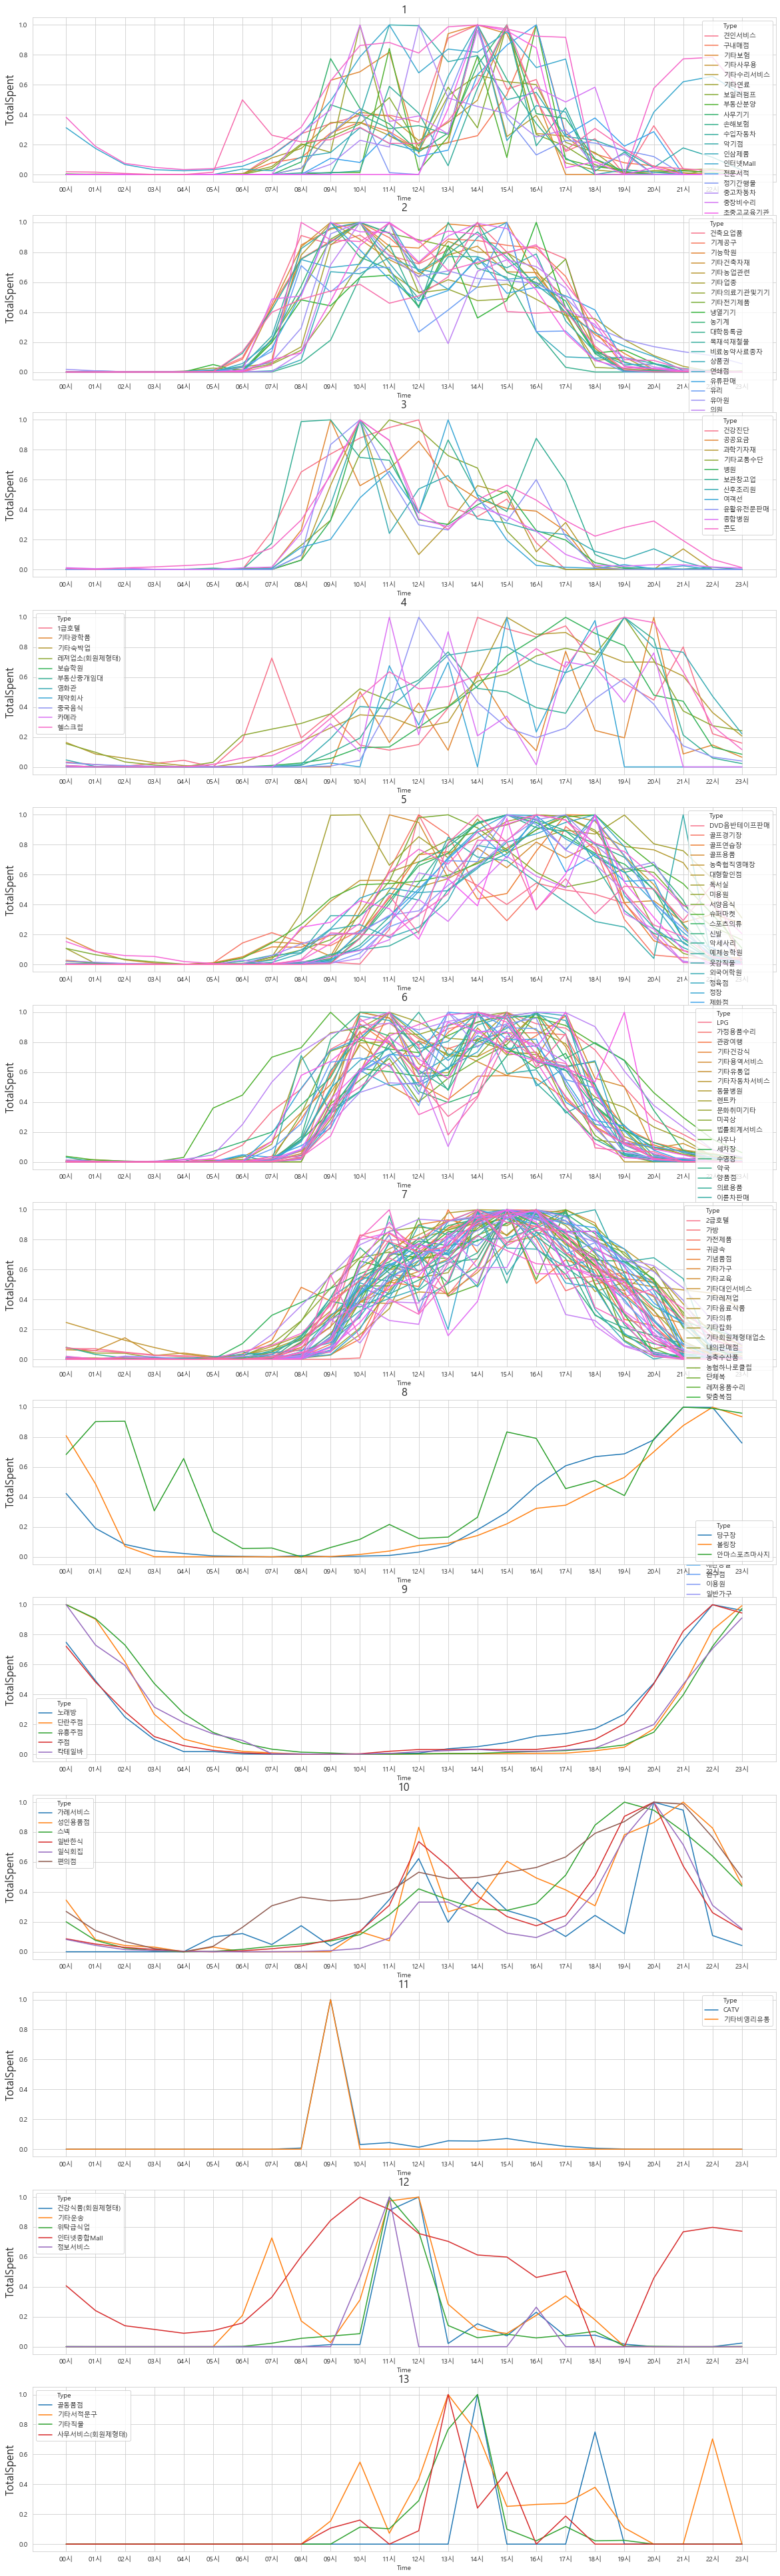

In [42]:
# 클러스터 그룹별로 시각화
fig, ax = plt.subplots(13, 1, figsize=(20, 70))
for i in range(1, 14):
    cluster_kind = list(cluster[cluster['Group']==i]['Type'])
    temp = df_scaled[df_scaled['Type'].isin(cluster_kind)]
    sns.lineplot(x=temp["Time"], y=temp["TotalSpent_scaled"], hue=temp["Type"], ax=ax[i-1])
    ax[i-1].legend().set_visible(True)
    ax[i-1].set_title(i, fontsize=16)
    ax[i-1].set_ylabel("TotalSpent", fontsize=16)

- 대체적으로 클러스터 구분이 잘된 모습으로 보임
- 클러스터 8,9 같은 심야와 새벽에 소비가 많이 몰리는 업종이 눈에 띄고, 클러스터 5와 7 같이 오후에 소비가 집중 되어있는 클러스터도 확인됨.
- 이외 클러스터들의 특징들을 파악하기 위해 클러트서별 평균값 그래프와 95% confidence interval을 그려봄

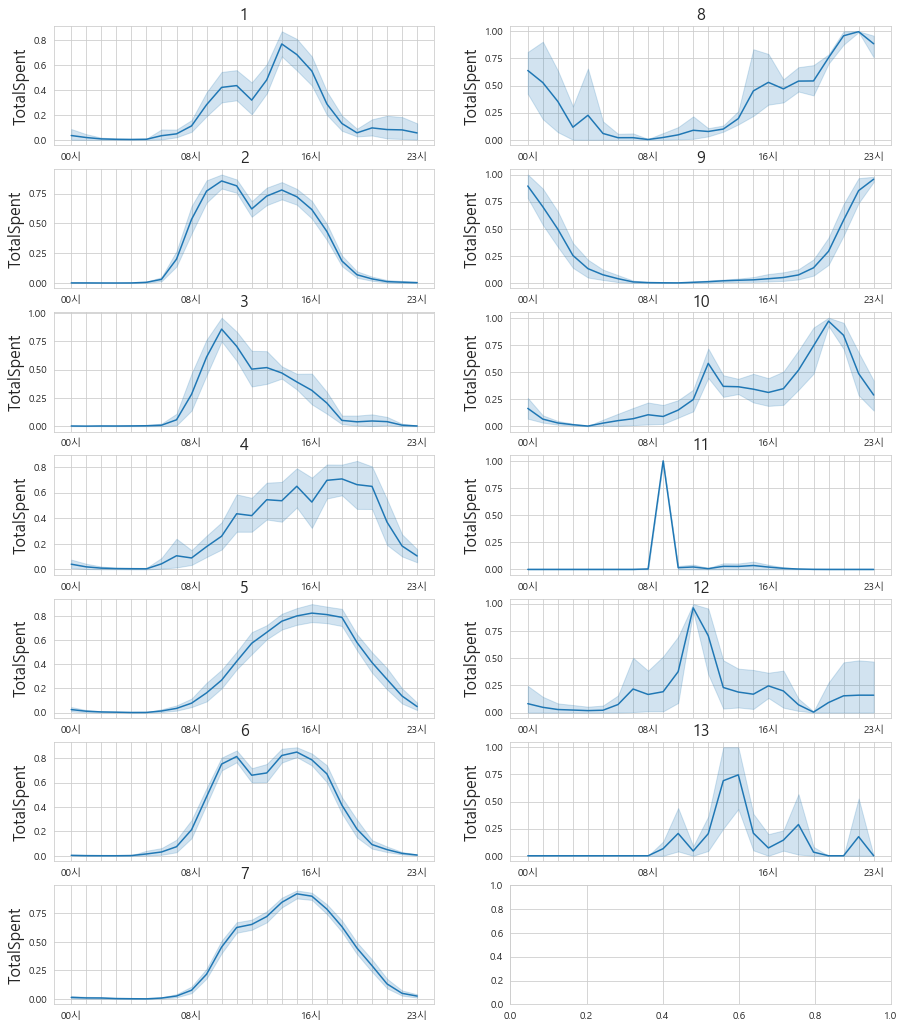

In [43]:
fig, ax = plt.subplots(7, 2, figsize=(15, 18))
for i in range(1, 14):
    col = (i - 1) // 7
    row = (i-1) % 7
    cluster_kind = list(cluster[cluster['Group']==i]['Type'])
    temp = df_scaled[df_scaled['Type'].isin(cluster_kind)]
    sns.lineplot(x=temp["Time"], y=temp["TotalSpent_scaled"], ax=ax[row, col],
                palette=sns.light_palette("royalblue", n_colors=temp["Type"].nunique()))
    ax[row, col].set_title(i, fontsize=16)
    ax[row, col].set_xticklabels(["00시"]+['']*7+["08시"]+['']*7+['16시']+['']*6+["23시"])
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel("TotalSpent", fontsize=16)

- 그래프들의 특성들은 소비가 집중되는 구간을 중심으로 아래와 같이 나눌 수 있음  
    1) 점심시간을 기준으로 봉우리 두개가 있는 **점심전후 소비 집중형 (1, 2, 6)**  
    2) 오전에 소비가 집중되어 있는 **오전형 (3)**  
    3) 오후 16~17시에 소비가 집중되어 있는 **오후형 (4, 5, 7)**  
    4) 점심 저녁으로 소비가 높은 **점심 저녁형 (10)**  
    5) 점심 소비가 높은 **점심형 (12)**  
    6) 저녁심야에 소비가 높아지는 **저녁심야형 (8,9)**  

In [44]:
graph_shapes = ["점심전후형_1", "점심전후형_2", "오전형_1", "오후형_1", "오후형_2", "점심전후형_3", "오후형_3", "저녁심야형_1", "저녁심야형_2",
"점심저녁형_1", "NA", "점심형_1", "NA"]

In [45]:
cluster['Shape'] = cluster["Group"].apply(lambda x: graph_shapes[x-1])
cluster_filtered = cluster[cluster['Shape'] != "NA"]

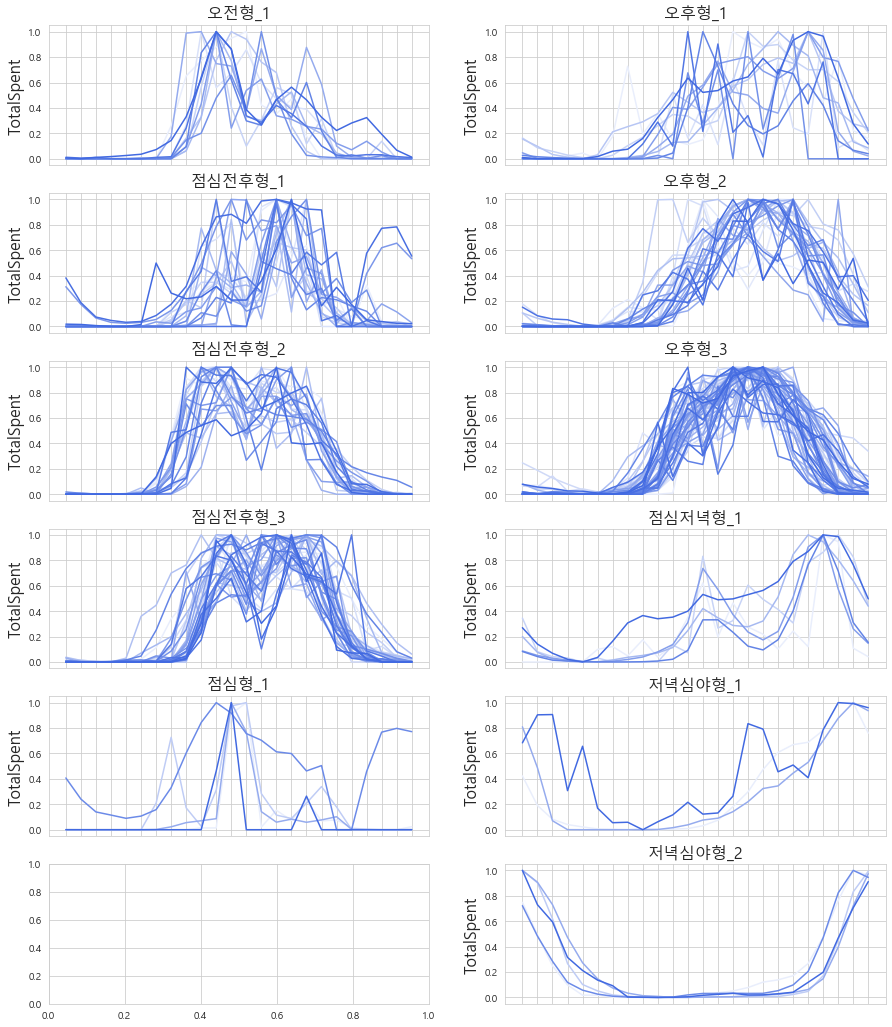

In [46]:
# 해당 클러스트들을 특성 별로 나열

graphs_order = ["오전형_1", "점심전후형_1", "점심전후형_2", "점심전후형_3", "점심형_1", "오후형_1", "오후형_2", "오후형_3", "점심저녁형_1", "저녁심야형_1", "저녁심야형_2"]

fig, ax = plt.subplots(6, 2, figsize=(15, 18))
for i in range(1, 12):
    if i > 5:
        index = i+1
    else:
        index = i
    col = (index - 1) // 6
    row = (index-1) % 6
    cluster_kind = list(cluster_filtered[cluster_filtered['Shape']==graphs_order[i-1]]['Type'])
    temp = df_scaled[df_scaled['Type'].isin(cluster_kind)]
    sns.lineplot(x=temp["Time"], y=temp["TotalSpent_scaled"], ax=ax[row, col], hue=temp['Type'],
                palette=sns.light_palette("royalblue", n_colors=temp["Type"].nunique()))
    ax[row, col].set_title(graphs_order[i-1], fontsize=16)
    ax[row, col].set_xticklabels([])
    ax[row, col].set_xlabel('')
    ax[row, col].legend().set_visible(False)
    ax[row, col].set_ylabel("TotalSpent", fontsize=16)

In [47]:
df_type_sum = df_all.groupby(["Type"]).agg({"TotalSpent":"sum"}).reset_index()

In [48]:
# 해당 클러스터별 소비가 높은 업종 상위 10개 나열
for a_group in graphs_order:
    types_in_group = cluster[cluster["Shape"]==a_group]['Type']
    temp_df = df_type_sum[df_type_sum["Type"].isin(types_in_group)]
    temp_df = temp_df.sort_values(by="TotalSpent", ascending=False)
    types_list = temp_df['Type'].values
    
    if len(types_list) < 10:
        print(a_group + ":")
        print(*types_list, sep=', ')
        print("-"*120)
    else:
        print(a_group + ":")
        print(*types_list[:10], sep=', ')
        print("-"*120)

오전형_1:
종합병원, 콘도, 병원, 공공요금, 건강진단, 산후조리원, 여객선, 윤활유전문판매, 기타교통수단, 보관창고업
------------------------------------------------------------------------------------------------------------------------
점심전후형_1:
인터넷Mall, 항공사, 화물운송, 기타수리서비스, 보일러펌프, 구내매점, 수입자동차, 악기점, 중장비수리, 중고자동차
------------------------------------------------------------------------------------------------------------------------
점심전후형_2:
유아원, 의원, 기타건축자재, 기계공구, 기타업종, 비료농약사료종자, 목재석재철물, 조세서비스, 기타농업관련, 상품권
------------------------------------------------------------------------------------------------------------------------
점심전후형_3:
주유소, 약국, 치과의원, 렌트카, LPG, 자동차정비, 티켓, 자동차부품, 가정용품수리, 자동차시트타이어
------------------------------------------------------------------------------------------------------------------------
점심형_1:
인터넷종합Mall, 기타운송, 위탁급식업, 건강식품(회원제형태), 정보서비스
------------------------------------------------------------------------------------------------------------------------
오후형_1:
기타숙박업, 중국음식, 보습학원, 헬스크럽, 레져업소(회원제형태), 부동산중개임대, 영화관

각 클러스터별 주요 특징들을 보자면
- 오전형에 종합병원, 병원, 건강진단, 산후 조리원 등 건강관리 업종이 많으며
- 저녁심야에는 유흥과 레크레이셔널성 업종들이 주를 이룸
- 점심저녁형은 식사시간인만큼 식당들이 대부분인 것으로 확인되었음.
- 많은 업종 수가 포함된 오후형의 경우 슈퍼마켓, 농축협매장, 대형할인점, 농축수산품 하나로클럽 등 생활소비 업종과 헬스클럽, 영화관, 미용원, 레져업소 등 오후 활동과 연관된 업종들이 많은 것을 볼 수 있음
- 점심전후형은 인터넷몰, 의원, 주유소, 약국 등이 눈에 띄며 일반적으로 알기는 어려웠던 해당 업종들의 소비패턴을 파악 할 수 있었음

##  ㅁ 지역별 소비 분석

In [49]:
# UTMK 좌표를 WGS84로 바꾸어줍니다

proj_UTMK = Proj(init = 'epsg:5178')
proj_WGS84 = Proj(init= 'epsg:4326')

transformer = Transformer.from_proj(proj_UTMK, proj_WGS84)
points = []
for index, item in df_all[['POINT_X', 'POINT_Y']].iterrows():
    points.append((item.POINT_X, item.POINT_Y))
    
latlist, lnglist = [], []
for pt in transformer.itransform(points):
    latlist.append(pt[1])
    lnglist.append(pt[0])
    
df_all['Latitude'] = latlist
df_all['Longitude'] = lnglist

In [77]:
# use kakao open API to get address and x, y coordinates
import requests

lat = df_all['Latitude'].values[0]
lon= df_all['Longitude'].values[0]

url = f"https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={lon}&y={lat}"

headers = {
    "Authorization": "KakaoAK"
}

requests.get(url, headers = headers).json()



{'errorType': 'RequestThrottled', 'message': 'API limit has been exceeded.'}

In [64]:
# 행정동 주소 가져오기 위한 함수
def get_address(lon, lat, headers):
    url = f"https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={lon}&y={lat}"
    address = requests.get(url, headers = headers).json()["documents"]
    
    return address[0]

In [89]:
# 복사본 데이터 셋을 생성 후 중복되는 위도, 경도를 제거
df = df_all.copy()
df["lon_lat"] = df["Longitude"].astype(str) + df["Latitude"].astype(str)
df = df.drop_duplicates("lon_lat")

In [90]:
len(df)

15369

In [92]:
# 중복 없는 위도, 경도 콤비네이션에 대한 행정동 주소 가져오기
headers = {
    "Authorization": "KakaoAK 8bcdbebf8e1c886ae09110fdfc0afd39"
}

gu  = []
dong = []
li = []

for index, item in df[["Latitude", "Longitude"]].iterrows():
    lon = item.Longitude
    lat = item.Latitude
    address = get_address(lon, lat, headers)
    
    gu.append(address['region_2depth_name'])
    dong.append(address['region_3depth_name'])
    li.append(address['region_4depth_name'])

In [93]:
len(gu)

15369

In [95]:
# 가져온 행정동 주소를 원래 데이터 셋과 merge 해주기
df["Gu"] = gu
df["Dong"] = dong
df["Li"] = li

df = df[['Latitude', "Longitude", "Gu", "Dong", "Li"]]

df_geo = pd.merge(df_all, df, on=["Latitude", "Longitude"], how="left")
df_geo.to_csv("df_geo.csv")

In [101]:
df_geo.head()

OBJECTID  Field1      YM     SIDO SIGUNGU FranClass  Type Time  TotalSpent  \
0         1       1  202005  제주특별자치도     제주시        영세  일반한식  00시      363000   
1         2       2  202005  제주특별자치도     제주시        영세  단란주점  00시     1180000   
2         3       3  202005  제주특별자치도     제주시       중소1   편의점  00시      157670   
3         4       4  202005  제주특별자치도     제주시        영세   편의점  00시       46600   
4         5       5  202005  제주특별자치도     제주시        영세    주점  00시       66000   

   DisSpent  ...      POINT_X       POINT_Y  dae_type  Time_cat   Latitude  \
0     66500  ...  877005.9834  1.479766e+06    음식점_식품        심야  33.305090   
1         0  ...  877005.7447  1.479816e+06    음식점_식품        심야  33.305540   
2      6850  ...  877056.6756  1.479616e+06        생활        심야  33.303746   
3         0  ...  877055.9593  1.479766e+06        생활        심야  33.305098   
4         0  ...  877055.4817  1.479866e+06    음식점_식품        심야  33.305999   

    Longitude                               lon_lat   Gu Dong   Li  
0  126.176746  126.1767459747347133.305089670045035  제주시  한경면  고산리  
1  126.176737  126.1767366124441933.305540299877514  제주시  한경면  고산리  
2  126.177311   126.1773107147930433.30374564295667  제주시  한경면  고산리  
3  126.177283  126.1772826351388833.305097531163554  제주시  한경면  고산리  
4  126.177264  126.1772639137603433.305998790085305  제주시  한경면  고산리  

[5 rows x 22 columns]

In [106]:
# 시 별로 소비금액 상위 15곳만 시각화
df = df_geo.groupby(["Gu", "Dong"]).agg({
    "TotalSpent":"sum", "DisSpent":"sum", "NumofSpent":"sum", "Latitude":"mean", "Longitude":"mean"}).reset_index()
df = df.sort_values(by=["Gu","TotalSpent"], ascending=False)

In [140]:
df_seogui = df[df["Gu"]=="서귀포시"][:15]
df_jejusi = df[df["Gu"]=="제주시"][:15]

fig = make_subplots(rows=2, cols=1,
                    subplot_titles=(
                        "제주시 동별 소비금액",
                        "서귀포시 동별 소비금액",         
                                   ))

fig.add_trace(
        go.Bar(x=df_jejusi["Dong"], y=df_jejusi["TotalSpent"],
              name="제주시 동별 소비금액",
              marker=dict(color=colors)),
    1, 1,
)

fig.add_trace(
        go.Bar(x=df_jejusi["Dong"], y=df_jejusi["DisSpent"],
              name="제주시 동별 재난지원금 소비금액",
              marker=dict(color=colors)),
    1, 1,
)

fig.add_trace(
        go.Bar(x=df_seogui["Dong"], y=df_seogui["TotalSpent"],
              name="서귀포시 동별 소비금액",
              marker=dict(color=colors)),
    2, 1,
)

fig.add_trace(
        go.Bar(x=df_seogui["Dong"], y=df_seogui["DisSpent"],
              name="서귀포시 동별 재난지원금 소비금액",
              marker=dict(color=colors)),
    2, 1,
)

fig.update_layout(height=500, width=1000, title_text="시별 소비금액 상위 15개 동")
fig.show()

- 앞서 본것과 같이 제주시의 소비가 서귀포시의 소비보다 많은 것을 동별 소비금액에서도 확인할 수 있음
- 제주시는 애월읍 까지 상위 6개의 동이 시 소비의 많은 부분을 차지하며,
- 서귀포시는 중문동까지 상위 11개의 동이 시 소비의 많은 부분을 차지함

In [138]:
# 제주시와 서귀포시 상위 15곳를 지도위에 시각화
fig = px.density_mapbox(df, lat=[], lon=[], z=[], radius=4,
                        center=dict( lat=df.Latitude.median(), 
                                     lon=df.Longitude.median()), 
                        mapbox_style="open-street-map"
                       )


fig.add_trace(go.Scattermapbox(lat=df_jejusi.Latitude, lon=df_jejusi.Longitude,
                                opacity = 0.75,
                                marker = dict(size = df_jejusi.TotalSpent / max(df_jejusi.TotalSpent) * 50, 
                                              color = 'coral',
                                              #line = dict(color='DarkSlateGrey', width=2)
                                             ),
                                text = [df_jejusi["Dong"].values[i] +":" + str(i+1) + "위 \n 소비금액(억원):"+str(round(df_jejusi['TotalSpent'].values[i]/100000000, 2)) for i in range(15)],
                                name = '제주시 소비금액 상위 15개 동'
                              ))

fig.add_trace(go.Scattermapbox(lat=df_seogui.Latitude, lon=df_seogui.Longitude,
                                opacity = 0.75,
                                marker = dict(size = df_seogui.TotalSpent / max(df_jejusi.TotalSpent) * 50, 
                                              color = 'blue',
                                              #line = dict(color='DarkSlateGrey', width=2)
                                             ),
                                text = [df_seogui["Dong"].values[i] +":" + str(i+1) + "위 \n 소비금액(억원):"+str(round(df_seogui['TotalSpent'].values[i]/100000000, 2)) for i in range(15)],
                                name = '서귀포시 소비금액 상위 15개 동'
                              ))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

- 제주시의 경우 소비 상위 15곳 중 한림읍, 애월읍, 조천읍, 구좌읍을 제외한 11 곳이 공항이 있는 제주시 중심가에 위치해 있음
- 반면, 서귀포시의 경우 상위 6곳만 서귀포시 중심가에 위치해 있으며 제주시에 비해 소비가 분산되어 있음

In [163]:
# 동별로 소비금액 상위 5개 업종 그래프화
df = df_geo.groupby(["Gu", "Dong", "Type"]).agg({
    "TotalSpent":"sum", "DisSpent":"sum", "NumofSpent":"sum", "Latitude":"mean", "Longitude":"mean"}).reset_index()

In [164]:

fig = make_subplots(rows=3, cols=5,
                    subplot_titles=([df_jejusi["Dong"].values[i] + "(" + str(i+1) + '위)' for i in range(15)]))

i = 0

for dong in df_jejusi["Dong"].values:
    
    row = (i // 5) + 1
    col = (i % 5) + 1
    
    df_dong = df[(df["Gu"] == "제주시")& (df["Dong"] == dong)].sort_values(by='TotalSpent', ascending=False)[:5]
    
    fig.add_trace(
            go.Bar(x=df_dong["Type"], y=df_dong["TotalSpent"],
                  name="제주시" + dong + "업종별 소비금액",
                  marker=dict(color=colors[i])),
        row, col,
    )
    
    i += 1

fig.update_layout(height=900, width=1000, title_text="제주시 동별 소비금액 상위 5위 업종")
fig.update_layout(showlegend=False)
fig.show()

해당 분석을 통해 앞서 보았던 소비 상위 15곳 동에 어떤 업종이 중점적으로 운영되고 어떤 업종이 입점해 있는지 유추해 볼 수 있음.
- 제주도 중심가에 위치하지 않은 애월읍, 한림읍, 조천읍, 구좌읍 모두 일반한식 소비가 가장 많은 부분을 차지하고, 한림읍에 경우 골프경기장이 있고, 애월읍은 농축협직영매장이 입점해 있는것을 볼수 있음
- 중심가에 위치한 동들도 대부분이 일반한식 비중에 제일 높은 가운데 용담이동은 공항을 포함하고 있어 면세점 소비가 가장 높고, 삼도이동은 일반한식점들이 적고 대형할인점, 레저용품, 병원이 주로 위치해 있는것을 유추해 볼수 있음
- 같은 맥락으로 도남동은 슈퍼마켓, 건입동은 농협하나로클럽이 소비 비중이 높은 것으로 볼때 관광지가 아닌 주민들 위주의 소비가 이루어 지는것으로 파악됨

In [171]:
fig = make_subplots(rows=3, cols=5,
                    subplot_titles=([df_seogui["Dong"].values[i] + "(" + str(i+1) + '위)' for i in range(15)]))

i = 0

for dong in df_seogui["Dong"].values:
    
    row = (i // 5) + 1
    col = (i % 5) + 1
    
    df_dong = df[(df["Gu"] == "서귀포시")& (df["Dong"] == dong)].sort_values(by='TotalSpent', ascending=False)[:5]
    
    fig.add_trace(
            go.Bar(x=df_dong["Type"], y=df_dong["TotalSpent"],
                  name="서귀포시" + dong + "업종별 소비금액",
                  marker=dict(color=colors[i])),
        row, col,
    )
    
    i += 1

fig.update_layout(height=900, width=1000, title_text="서귀포시 동별 소비금액 상위 5위 업종")
fig.update_layout(showlegend=False)
fig.show()

- 마찬가지로 일반한식이 많은 동에서 높은 비중을 차지하지만 몇가지 눈에 띄는 특징들은
- 제주시의 한림읍과 마찬가지로 남원읍고 상효동에 골프경기장이 잇는 것을 볼 수 있고, 색달동은 특급호텔이 주요 소비를 그리고 강정동과 서홍동은 대형할인점이 주요 소비를 책임지고 있음.
- 동홍동과 상효동은 슈퍼마켓이 가장 큰 비중을 차지하고, 상효동의 압도적이게 높은 슈퍼마켓 비중은 다소 고립된 상효동의 위치로 인해 주민 소비가 슈퍼마켓 중심으로 이뤄져 생긴 결과라 볼수 있음

### [요약 / 결론]

주어진 제주도의 소비 데이터에 관해
- 업종별 소비는 음식점_식품 과 생활에 많은 비중이 할당된것을 확인했고, 5~8월까지 관광객 수 증가로 인한 관광 업종의 소비 증가 또한 확인하였음
- 시간별 소비는 주로 점심부터 저녁까지 시간에 많은 소비가 집중 되어 있었고, Hierarchical 클러스터링을 통해 기존 대분류가 아닌 새로운 업종 분류 방식을 제시해 6가지의 새로운 분류 그룹을 도출해 보았음.
- 지역별 소비는 각 시의 중심가 주변에 집중되어 있는 것을 확인하였고, 각 동별 상위 소비 업종을 통해 각 동들의 주요한 경제적 견인을 맡고 있는 업종을 파악해 보았음.

이 같은 분석을 통해, 추후 재난지원금 배포 방법을 단순한 범국민 지급이 아닌 새롭게 접근 해볼수 있음.  

  예시) 
1. 피해가 많은 업종을 파악하여 해당 업종이 가장 많이 소비되는 시간이나 지역에 재난지원금을 지원할 수록 추진  
2. 특정 소상공인구분을 타겟하여 해당 소상공인구분 비중이 높은 업종을 타겟으로 재난지원금을 소비할 수 있도록 제도화


# [부동산] 제주의 부동산에는 어떠한 변화가 있었을까

## **_ㅁ 배경_**

> 올해 코로나 만큼이나 뉴스와 전국민의 대화주제의 상당 부분을 차지했던 부동산 시장.  
제주도에서는 어떠한 변화와 눈여겨볼 점이 있었는지 소비와 연관지어 나름의 궁금증을 풀어보려합니다

## **_ㅁ 제주도 부동산 시장 분석_**

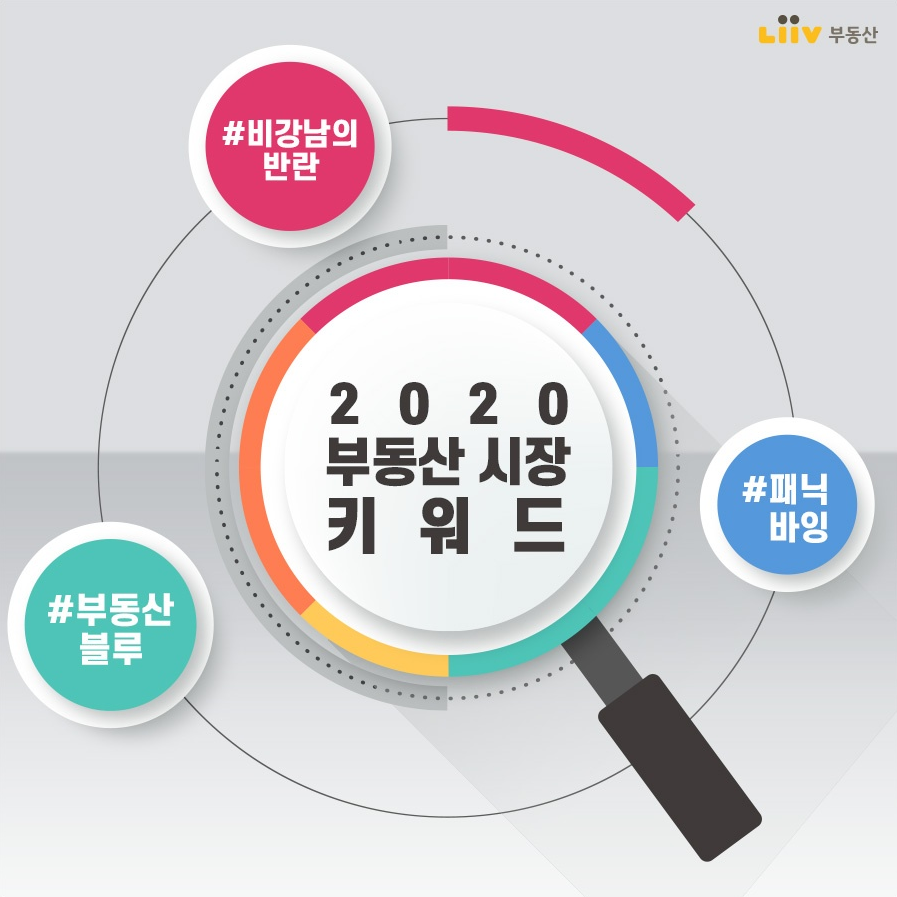

In [49]:
from IPython.display import Image
display(Image(filename='real_estate_keywords.png', width = 500, height = 500))

_**들어가기 전에 KB부동산 Liiv ON 에서 친절히 정리해준 올해 부동산 내용을 보면...**_
- **[부동산 블루]** 다주택자는 높은 세금, 1주택자는 더 좋은 집으로 옮기지 못해서, 무주택자는 전셋값, 집값이 모두 올라 우울증과 무기력증을 느끼는 부동산 블루
- **[비강남의 반란]** 올해 11월까지 강북 아파트값 12.79% 상승으로 강남의 10.56%을 넘어섬.  
또한 경기도 김포(15.38%), 수원 영통구(21.63%), 대전 서구(17.04%), 부산 해운대구(16.27%) 등 경기도와 광역시 중심으로 많이 오른 추세를 보임
- **[패닝 바잉]** 지난 여름부터 30대들의 패닉바잉을 이어, 10월 20대 이하가 사들인 아파트는 전체의 5.4%로 연령별 통계가 시작된 작년 1월 이후 처음 5% 돌파. (ㅠㅠㅠ 집 나만 없어...)

출처: https://www.mk.co.kr/news/realestate/view/2020/12/1305822/

_**위와 같은 트랜드가 제주도에서도 연관이 있을까...?**_

### ㅇ 1a 제주도 아파트 매매 및 전세가 분석
_도로교통부 실거래가 공개시스템 이용(http://rtdown.molit.go.kr/)_  
&nbsp;  
&nbsp;  

In [50]:
# thousands=',' 파라매터를 통한 string => integer 변환
# 데이터 로딩
df_apart_maemae = pd.read_csv("./아파트(매매)__실거래가_20201222224816.csv", encoding='cp949', thousands = ',')

In [51]:
# 데이터 체크 1
df_apart_maemae.head(2)

시군구     번지   본번  부번         단지명  전용면적(㎡)    계약년월  계약일  \
0  제주특별자치도 서귀포시 강정동  165-4  165   4         다온빌  26.5400  202002   13   
1  제주특별자치도 서귀포시 강정동    193  193   0  서귀포강정골드클래스  84.9789  202001   16   

   거래금액(만원)  층  건축년도            도로명  
0      8000  3  2016  김정문화로27번길 9-2  
1     37000  2  2017         대청로 11

In [52]:
#데이터 체크 2
df_apart_maemae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 12 columns):
시군구         3233 non-null object
번지          3233 non-null object
본번          3233 non-null int64
부번          3233 non-null int64
단지명         3233 non-null object
전용면적(㎡)     3233 non-null float64
계약년월        3233 non-null int64
계약일         3233 non-null int64
거래금액(만원)    3233 non-null int64
층           3233 non-null int64
건축년도        3233 non-null int64
도로명         3233 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 303.2+ KB


In [53]:
def filter_count_avgprice(df, location):
    """
    df = dataframe to filter from
    location = string of location to search within 시군구
    """
    df_filter_1 = df[df['시군구'].apply(lambda x: location in x)]
    df_filter_2 = df_filter_1.groupby(['계약년월']).agg(
        {'전용면적(㎡)' : 'sum', '거래금액(만원)' : 'sum', '층':'count'}
        ).reset_index().rename(columns={'층': (location +'_count')})
    df_filter_2[('면적금액평균_'+location)] = df_filter_2['거래금액(만원)'] / df_filter_2['전용면적(㎡)']
    df_filter_2[('매매평균면적_'+location)] = df_filter_2['전용면적(㎡)'] / df_filter_2[(location +'_count')]
    
    return df_filter_2

In [54]:
# 제주시의 매매 아파트 기준 월별 면적 별 거래 금액 평균, 매매 수, 매매 면적 평균을 먼저 구해봅니다
maemae_wholejeju = filter_count_avgprice(df_apart_maemae, '제주')

# 제주시와 서귀포시만 필터해서 월별 면적 당 거래 금액 평균, 매매 수, 매매 면적 평균을 구해봅니다
maemae_jejusi = filter_count_avgprice(df_apart_maemae, '제주시')
maemae_seguisi = filter_count_avgprice(df_apart_maemae, '서귀포시')

In [55]:
# 제주도의 아파트 값이 꾸준하게 오르는 추이를 보여주고, 면적 또한 커지는 추세, 매매 건수도 증가하는 추세입니다
# 제주시에 평균적으로 서귀포시 보다 매매수가 더 많고, 면적도 더 크네요. 면적별매매가도 더 비쌉니다

jeju_maemae_summary = pd.concat(
    [
     maemae_wholejeju[['계약년월','제주_count', '면적금액평균_제주', '매매평균면적_제주']], 
     maemae_jejusi[['제주시_count', '면적금액평균_제주시', '매매평균면적_제주시']], 
     maemae_seguisi[['서귀포시_count','면적금액평균_서귀포시', '매매평균면적_서귀포시']]
    ] , axis = 1)

# convert to datetime
jeju_maemae_summary['계약년월'] = jeju_maemae_summary['계약년월'].apply(lambda x : datetime.strptime(str(x), '%Y%m').date())

jeju_maemae_summary.head(2)

계약년월  제주_count   면적금액평균_제주  매매평균면적_제주  제주시_count  면적금액평균_제주시  \
0  2019-12-01       273  384.517563  70.458463        221  389.360718   
1  2020-01-01       285  382.761514  64.040069        191  387.207844   

   매매평균면적_제주시  서귀포시_count  면적금액평균_서귀포시  매매평균면적_서귀포시  
0   72.159785          52   361.026422    63.227846  
1   71.006537          94   369.901623    49.884799

In [56]:
# 그래프 그리기 위한 함수 정의

def plot_summary(df_summary,feature, name):
    # 한글 안깨지게 하기
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False

    #월별 면적당 평균 매매금액 그래프
    fig = plt.figure(figsize=(13, 18))
    ax1 = fig.add_subplot(211)

    ax1.plot(
        df_summary['계약년월'], 
        df_summary[feature + '_제주'],
        linewidth = 3
        )
    ax1.plot(
        df_summary['계약년월'], 
        df_summary[feature + '_제주시'])
    ax1.plot(
        df_summary['계약년월'], 
        df_summary[feature + '_서귀포시'])

    #regression line for 제주 전체
    x = np.array(list(range(12)))
    m, b = np.polyfit(x, df_summary[feature + '_제주'], 1)

    ax1.plot(df_summary['계약년월'],
            m*x+b,
            linewidth = 3,
            linestyle = '--',
            alpha = 0.5)

    # style details
    max_y = max(df_summary[feature + '_제주시']) + 20
    min_y = min(df_summary[feature + '_서귀포시']) - 20
    ax1.set_ylim(min_y, max_y)
    ax1.set(xlabel='계약년월', ylabel= feature + '(만원)',
            title = '20년 월별'+ name + '평균가')
    ax1.legend(labels = ['제주전체', '제주시', '서귀포시', '제주전체 회귀'])

    #월별 매매건수 그래프

    ax2 = fig.add_subplot(212)

    ax2.plot(
        df_summary['계약년월'], 
        df_summary['제주_count'],
        linewidth = 3
        )
    ax2.plot(
        df_summary['계약년월'], 
        df_summary['제주시_count'])
    ax2.plot(
        df_summary['계약년월'], 
        df_summary['서귀포시_count'])

    #regression line for 제주 전체
    x = np.array(list(range(12)))
    m, b = np.polyfit(x, df_summary['제주_count'], 1)

    ax2.plot(df_summary['계약년월'],
            m*x+b,
            linewidth = 3,
            linestyle = '--',
            alpha = 0.5)

    # style details
    max_y = max(df_summary['제주_count']) + 20
    min_y = min(df_summary['서귀포시_count']) - 20
    ax2.set_ylim(min_y, max_y)
    ax2.set(xlabel='계약년월', ylabel='월' + name + '건수',
            title = '20년 월별' + name + '건수')
    ax2.legend(labels = ['제주전체', '제주시', '서귀포시', '제주전체 회귀'])

    #plt.style.available  <= to check styles
    plt.style.use('seaborn')
    plt.show()
    
    return None

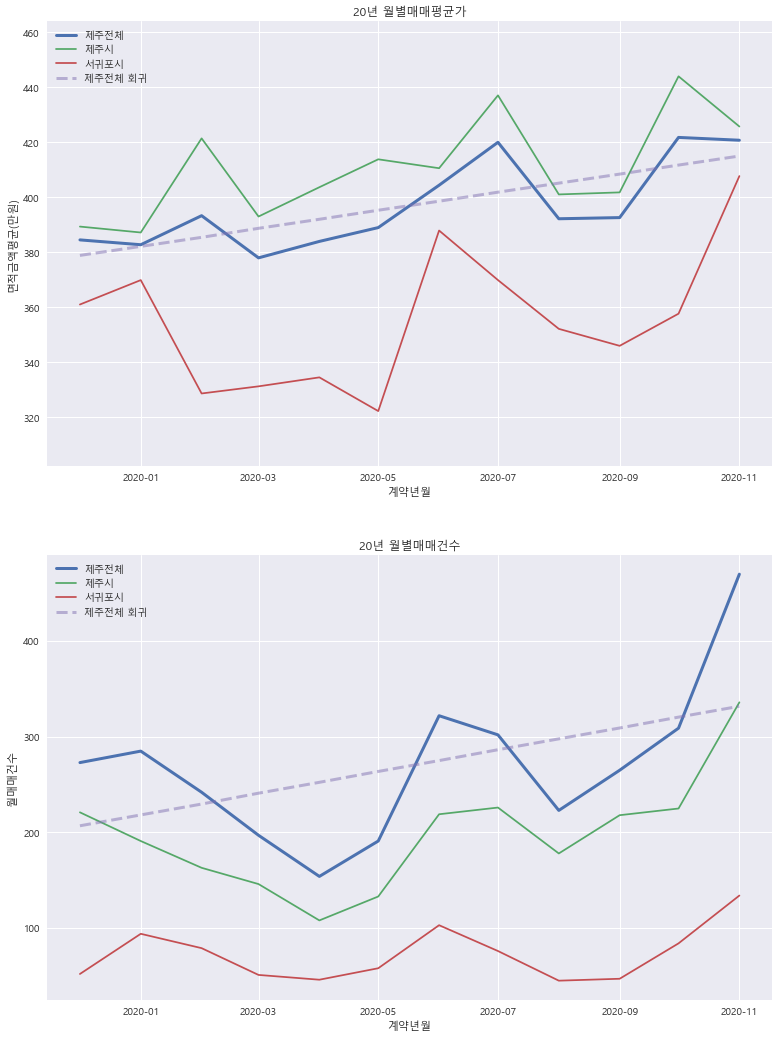

In [57]:
plot_summary(jeju_maemae_summary, '면적금액평균', '매매')

**[제주도 월별 면적당 매매가는 1년간 약 9%(월평균 1%) 증가하며 10% 중반대의 서울 수도권에 비해 낮지만 상승세는 존재]**
- '19.12월부터 '20.11월까지의 제주도 내 아파트의 월별 면적당(㎡) 매매가 평균은 면적 당 384.5 만원에서  470.8 만원으로 약 9% 상승
- 같은 기간 제주시는 389.4 만원에서 425.7 만원으로 9.3%, 서귀포시는 361 만원에서 407.7만원으로 12.9% 상승. 또한 제주시의 매매가가 서귀포시보다 평균적으로 높은것으로 나타남.

**[제주도 내 아파트 매매건수는 월평균 5% 씩 상승하며, 수요 증가에 의한 매매가 상승 효과 존재]** 
- 같은 기간 제주도 아파트 매매건수는 273건에서 470건으로 72% 상승하였고, '20년 8월 기준으로 제주시와 서귀포시 모두 상승하는 트렌드를 볼수 있음
- 매매 건수 증가에 따라 정부 정책 이외에도 제주 내 아파트 수요가 증가에 따른 매매가 상승을 유추해 볼 수 있음

In [58]:
# 아파트 전세값도 한번 알아봅니다...
df_apart_junwolsae = pd.read_csv("./아파트(전월세)_실거래가_20201222173817.csv", encoding='cp949', thousands = ',')

In [59]:
#데이터 체크2
df_apart_junwolsae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190 entries, 0 to 4189
Data columns (total 14 columns):
시군구        4190 non-null object
번지         4190 non-null object
본번         4190 non-null int64
부번         4190 non-null int64
단지명        4190 non-null object
전월세구분      4190 non-null object
전용면적(㎡)    4190 non-null float64
계약년월       4190 non-null int64
계약일        4190 non-null int64
보증금(만원)    4190 non-null int64
월세(만원)     4190 non-null int64
층          4190 non-null int64
건축년도       4190 non-null int64
도로명        4190 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 458.4+ KB


In [60]:
df_apart_junwolsae.head(2)

시군구   번지   본번  부번          단지명 전월세구분  전용면적(㎡)    계약년월  계약일  \
0  제주특별자치도 서귀포시 강정동  163  163   0  Gwangjin하우스    전세    22.61  202002   28   
1  제주특별자치도 서귀포시 강정동  189  189   0      강정상록아파트    월세    59.97  201912    5   

   보증금(만원)  월세(만원)  층  건축년도         도로명  
0     5000       0  3  2014  신서로48번길 22  
1     8303      14  8  2015      신서로 55

In [61]:
# 제주, 제주시, 서귀포시에 따라 데이터를 정리해주는 함수
def filter_count_avgprice_junwolsae(df, location):
    """
    df = dataframe to filter from
    location = string of location to search within 시군구
    """
    df_filter_1 = df[df['시군구'].apply(lambda x: location in x)]
    df_filter_2 = df_filter_1.groupby(['계약년월']).agg(
        {'전용면적(㎡)' : 'sum', '보증금(만원)' : 'sum', '월세(만원)' : 'sum' ,'층':'count'}
        ).reset_index().rename(columns={'층': (location +'_count')})
    df_filter_2[('면적별보증금평균_'+location)] = df_filter_2['보증금(만원)'] / df_filter_2['전용면적(㎡)']
    df_filter_2[('면적별월세평균_'+location)] = df_filter_2['월세(만원)'] / df_filter_2['전용면적(㎡)']
    df_filter_2[('평균면적_'+location)] = df_filter_2['전용면적(㎡)'] / df_filter_2[(location +'_count')]
    
    return df_filter_2

In [62]:
# 전세로 월별 면적 별 보증금/월세 평균, 매매 수, 매매 면적 평균을 먼저 구해봅니다
# 전체적으로 전세 수가 줄어들고, 보증금 평균은 up and down이 많습니다
df_apart_junsae = df_apart_junwolsae[df_apart_junwolsae['전월세구분'] == '전세']
junsae_wholejeju = filter_count_avgprice_junwolsae(df_apart_junsae, '제주')
junsae_seguisi = filter_count_avgprice_junwolsae(df_apart_junsae, '서귀포시')
junsae_jejusi = filter_count_avgprice_junwolsae(df_apart_junsae, '제주시')

# 매매가와 똑같이 그래프를 위해 다 붙혀줍니다
jeju_junsae_summary = pd.concat(
    [
     junsae_wholejeju[['계약년월','제주_count', '면적별보증금평균_제주', '평균면적_제주']], 
     junsae_jejusi[['제주시_count', '면적별보증금평균_제주시', '평균면적_제주시']], 
     junsae_seguisi[['서귀포시_count','면적별보증금평균_서귀포시', '평균면적_서귀포시']]
    ] , axis = 1)

#동일하게 datetime 으로 바꿔줍니다
jeju_junsae_summary['계약년월'] = jeju_junsae_summary['계약년월'].apply(lambda x : datetime.strptime(str(x), '%Y%m').date())

jeju_junsae_summary.head(2)

계약년월  제주_count  면적별보증금평균_제주    평균면적_제주  제주시_count  면적별보증금평균_제주시  \
0  2019-12-01       293   255.516229  75.102728        253    256.130653   
1  2020-01-01       321   259.476234  73.734939        286    261.866128   

    평균면적_제주시  서귀포시_count  면적별보증금평균_서귀포시  평균면적_서귀포시  
0  74.987359          40     251.673311  75.832435  
1  74.358218          35     238.321058  68.641857

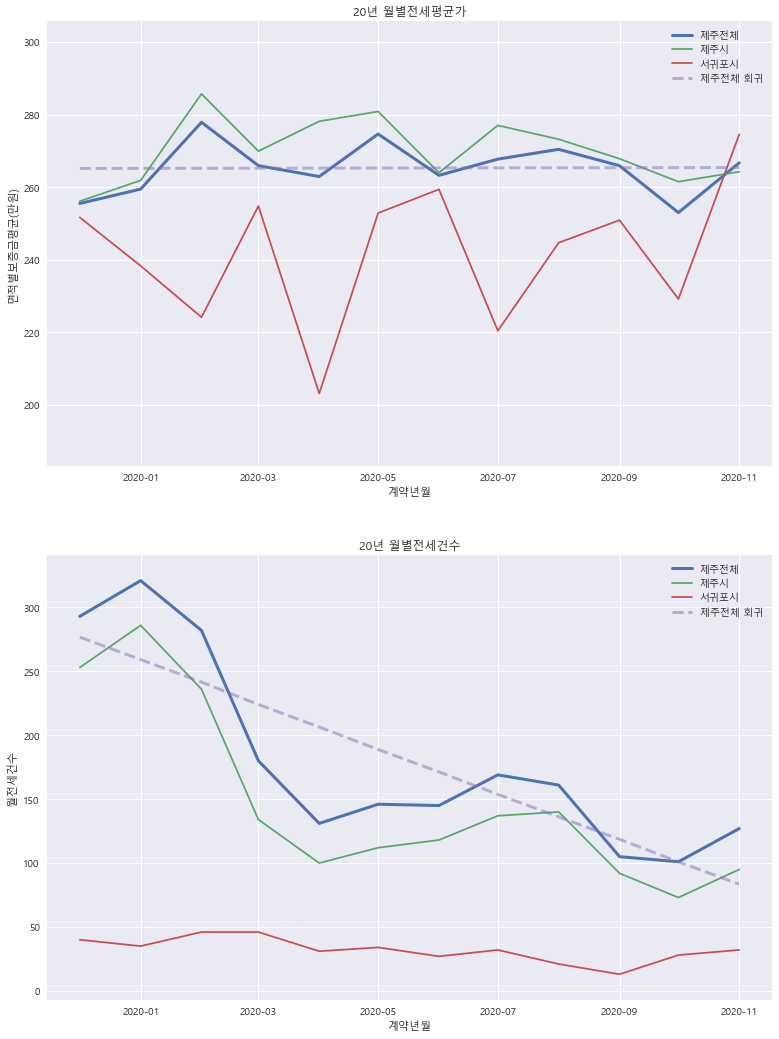

In [63]:
plot_summary(jeju_junsae_summary, '면적별보증금평균', '전세')

**[제주도 월별 면적당 전세가는 265만원 선을 맴돌면서 매매가 대비 큰 변화가 존재하지 않음]**
- '19.12월부터 '20.11월까지의 제주도 내 아파트의 월별 면적당(㎡) 전세가 평균은 265만원 +-10만원 range를 유지하며 상승 또는 하락 추세가 보이지 않음
- 같은 기간 제주시의 전세가는 매매가와 동일하게 서귀포시보다 높은 수준으로 두 지역 모두 특별한 추세가 없으나, 서귀포시의 변동폭이 넓음

**[제주도 내 아파트 전세체결건수는 변화가 없는 전세가에 비해 월평균 7% 씩 감소하며 하락세]** 
- 같은 기간 제주도 아파트 전세건수는 293건에서 127건으로 47% 줄어들었고, '20년 1월 에서 4월까지 가파르게 감소 함
- 전세 가격에 변화가 미비하고 전세건수가 줄어드는 추세를 보았을때 전세에 대한 전체적인 수요와 공급이 줄어들었음을 예상해 볼 수 있음

### [보너스] 1b 제주 토지 가격 추이

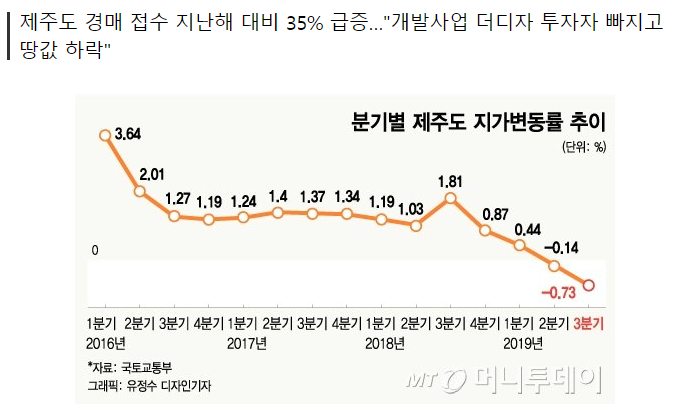

In [64]:
display(Image(filename='jeju_land_price.png', width = 600, height = 500))

- _기사출처: 머니투데이 (https://news.mt.co.kr/mtview.php?no=2019112614130756109&EMBA)_  
  15년도까지 중국에서 몰려온 투자자로 급등 했던 제주 땅값이 16년도 이후 하락세로 돌아섰다.  
- 20년 3월부터 6월까지 외국인이 약 380억 규모의 토지 약 16만㎡ 매도, 162억원 규모의 토지 4만㎡를 매입하며 토지 매도에 비중이 쏠렸으나, 7월부터 253억원 규모의 토지 4만㎡ 을 매입하며 흐름의 변화가 감지된다는 분석 존재  
(http://www.jejusori.net/news/articleView.html?idxno=320308)

## **_ㅁ 제주도 부동산 시장과 소비의 관계_**

**제주도 지역별 소비금액이 지역 부동산 가격의 현상/선행 지표가 될 수 있을까?**
- 주어진 데이터중 가장 소비가 많은 '20.8월을 기준으로 **가장 소비가 많았던 곳**이 **가장 아파트 값이 비쌌던 곳**이라고 볼수 있는지,
- 그리고 **'20.5~8월 까지의 소비변화**가 8월 이후 아파트 값을 예상해 볼 수 있는 **선행지표**가 될수 있는지 확인해보려 합니다

#### - 2a 먼저 '20.8월 가장 비쌌던/ 저렴했던 곳을 찾아봅니다

In [65]:
# 지역별 과 계약년월로 그룹핑을 해주고 지역당 면적평균 금액을 구합니다
df_apart_maemae_avg = df_apart_maemae.groupby(
                            ['시군구', '계약년월']
                        ).agg(
                            {'거래금액(만원)':'sum',
                             '전용면적(㎡)':'sum'}
                        ).reset_index()
df_apart_maemae_avg['면적평균금액'] = df_apart_maemae_avg['거래금액(만원)'] / df_apart_maemae_avg['전용면적(㎡)']

# 데이터를 다루기 쉽게 피봇 테이블로 만들어줍니다
pivot_apart_maemae = df_apart_maemae_avg.pivot(
                            index = '시군구', columns = '계약년월', values = '면적평균금액'
                        ).reset_index()

# 앞에 '제주특별자치도'는 빼줍니다
pivot_apart_maemae['시군구'] = pivot_apart_maemae['시군구'].apply(lambda x: x[8:])

####기본정보 
# pivot_apart_maemae.columns
# Index([ '시군구', 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011],
#      dtype='object', name='계약년월')

# len(pivot_apart_maemae['시군구'])
# 62

#그래프를 그릴 데이터만 따로 뽑아줍니다 (면적당 매매가 상위 10곳)
df_avg_202004 = pivot_apart_maemae[['시군구', 202004]].sort_values([202004], ascending=False).head(10)
df_avg_202008 = pivot_apart_maemae[['시군구', 202008]].sort_values([202008], ascending=False).head(10)

#면적당 매매가 하위 10곳
df_avg_202004_low = pivot_apart_maemae[['시군구', 202004]].sort_values([202004], ascending=False)[pivot_apart_maemae[202004].isna() == False].tail(10)
df_avg_202008_low = pivot_apart_maemae[['시군구', 202008]].sort_values([202008], ascending=False)[pivot_apart_maemae[202008].isna() == False].tail(10)

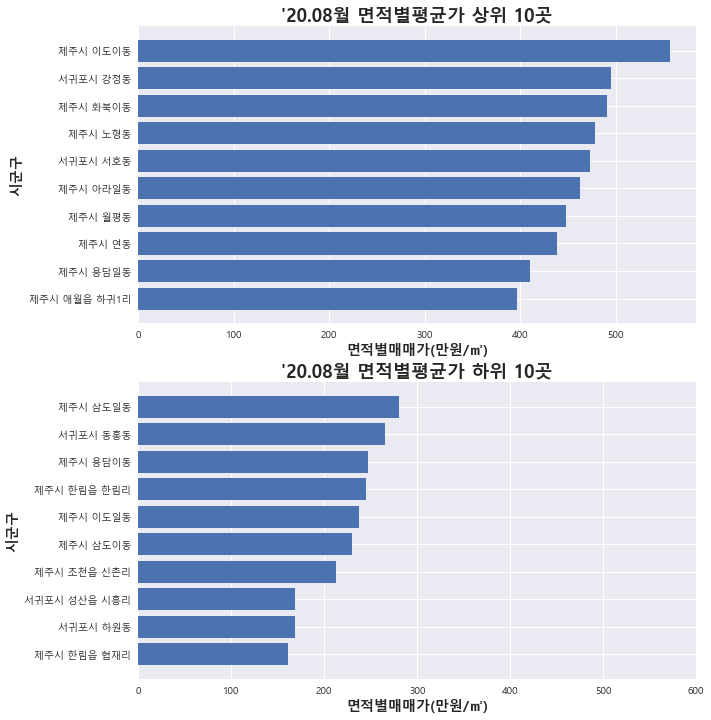

In [66]:
#한글 깨지는걸 방지
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(10, 12))

# 20년 08월 면적별매매평균가 상위 10곳 
ax1 = fig.add_subplot(211)
ax1.barh(df_avg_202008['시군구'], df_avg_202008[202008], align='center')
ax1.invert_yaxis()
ax1.set_ylabel('시군구', fontsize=14, fontweight='bold')
ax1.set_xlabel('면적별매매가(만원/㎡)', fontsize=14, fontweight='bold')
ax1.set_title('\'20.08월 면적별평균가 상위 10곳', fontsize=18, fontweight = 'bold')

# 20년 08월 면적별매매평균가 하위 10곳 
ax2 = fig.add_subplot(212)

ax2.barh(df_avg_202008_low['시군구'], df_avg_202008_low[202008], align='center')
ax2.invert_yaxis()
ax2.set_ylabel('시군구', fontsize=14, fontweight='bold')
ax2.set_xlabel('면적별매매가(만원/㎡)', fontsize=14, fontweight='bold')
ax2.set_title('\'20.08월 면적별평균가 하위 10곳', fontsize=18, fontweight = 'bold')
ax2.set_xlim(0, 600)


plt.style.use('seaborn')
plt.show()


**['20.8월 기준 면적별평균가 1위는 제주시 이도이동(556만원/㎡), 하위 1위는 제주시 한리읍 협재리(161만원/㎡]** 
- 면적별평균가 상/하위 10지역을 계산해본 결과 최상위 지역과 최하위 지역의 면적당 거래가는 400만원 정도 차이 존재
- 초기에 제주시와 서귀포시의 지역 차이에 따른 가격 차이가 있을 것으로 예상했으나(제주시가 더 비싸고, 서귀포시가 더 싸다던지) 지역차이 따른 가격차이는 보이지 않음 

In [67]:
# 추후 지도에 그리기 위한 좌표 기록
# 좌표는 구글맵 기준, 동이름이 적혀있는곳의 좌표를 한땀한땀 옮겻습니다...ㅠㅠ
lowest_10_aug = ['제주시 삼도일동', '서귀포시 동홍동', '제주시 용담이동', '제주시 한립읍 한림리', '제주시 이도일동', 
 '제주시 삼도이동', '제주시 조천읍 신촌리', '서귀포시 성산읍 시흥리', '서귀포시 하원동', '제주시 한림읍 협재리']

lowest_10_aug_coor = [[33.50129, 126.52034], [33.26653, 126.56710], [33.51165, 126.51059], [33.41225, 126.27300],[33.50731, 126.52653],
 [33.51188, 126.52194], [33.52560, 126.61541], [33.46905, 126.88563], [33.25769, 126.45970], [33.38150, 126.24816]]

df_lowest_10_aug = pd.DataFrame(data = lowest_10_aug_coor, columns = ['Latitude', 'Longitude'])

df_lowest_10_aug['시군구'] = lowest_10_aug

In [68]:
# 좌표 기록 2
highest_10_aug = ['제주시 아라일동', '서귀포시 강정동', '제주시 이도이동', '제주시 노형동', '제주시 월평동', 
 '제주시 화북이동', '서귀포시 서호동', '제주시 연동', '제주시 용담일동', '제주시 애월읍 하귀1리']

highest_10_aug_coor = [[33.47099, 126.54597], [33.25354, 126.49435], [33.49607, 126.53883], [33.46321, 126.47139],[33.46025, 126.57864],
 [33.50544, 126.56598], [33.26991, 126.51622], [33.47682, 126.49314], [33.50859, 126.51444], [33.48020, 126.41602]]

df_highest_10_aug = pd.DataFrame(data = highest_10_aug_coor, columns = ['Latitude', 'Longitude'])

df_highest_10_aug['시군구'] = highest_10_aug

#### -  2b '20.8월 이후 11월 까지 면적당매매가 상승률이 가장 높았던/ 낮았던 지역을 찾아봅니다

In [69]:
# 혹시 몰라 상승률을 다 구했었는데, 일단 8~11월만 써봅니다
pivot_apart_maemae['1~4월_상승률'] = (pivot_apart_maemae[202004] - pivot_apart_maemae[202001]) / pivot_apart_maemae[202001]
pivot_apart_maemae['4~8월_상승률'] = (pivot_apart_maemae[202008] - pivot_apart_maemae[202004]) / pivot_apart_maemae[202004]
pivot_apart_maemae['8~11월_상승률'] = (pivot_apart_maemae[202011] - pivot_apart_maemae[202008]) / pivot_apart_maemae[202008]
pivot_apart_maemae['1~11월_상승률'] = (pivot_apart_maemae[202011] - pivot_apart_maemae[202001]) / pivot_apart_maemae[202001]

In [70]:
# 상위 10곳, 하위 10곳으로 나눕니다
df_increase = pivot_apart_maemae[['시군구', '8~11월_상승률']].sort_values(['8~11월_상승률'], ascending=False).head(10)
df_decrease = pivot_apart_maemae[['시군구', '8~11월_상승률']].sort_values(['8~11월_상승률'], ascending=False)[pivot_apart_maemae['8~11월_상승률'].isna() == False].tail(10)

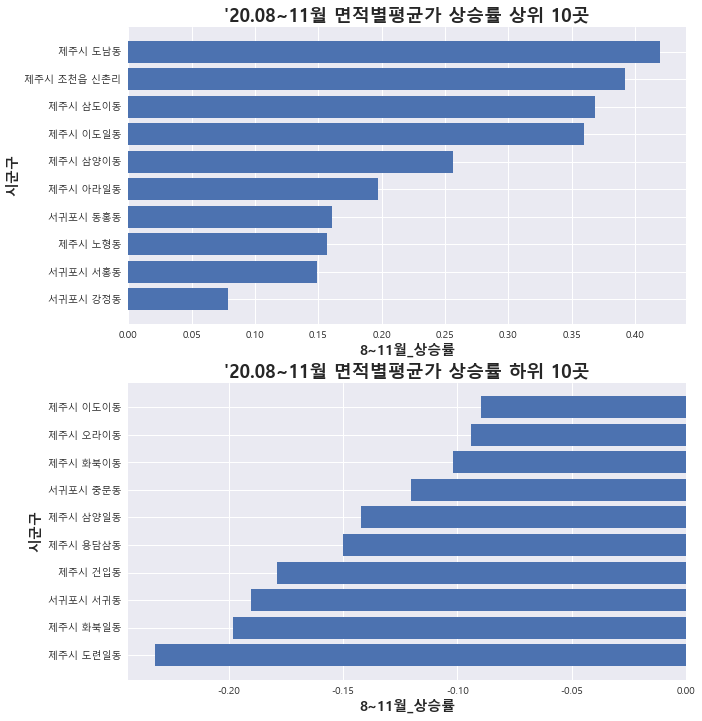

In [71]:
#한글 깨지는걸 방지
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(10, 12))

# 20년 08월 면적별매매평균가 상위 10곳 
ax1 = fig.add_subplot(211)
ax1.barh(df_increase['시군구'], df_increase['8~11월_상승률'], align='center')
ax1.invert_yaxis()
ax1.set_ylabel('시군구', fontsize=14, fontweight='bold')
ax1.set_xlabel('8~11월_상승률', fontsize=14, fontweight='bold')
ax1.set_title('\'20.08~11월 면적별평균가 상승률 상위 10곳', fontsize=18, fontweight = 'bold')

# 20년 08월 면적별매매평균가 하위 10곳 
ax2 = fig.add_subplot(212)

ax2.barh(df_decrease['시군구'], df_decrease['8~11월_상승률'], align='center')
ax2.invert_yaxis()
ax2.set_ylabel('시군구', fontsize=14, fontweight='bold')
ax2.set_xlabel('8~11월_상승률', fontsize=14, fontweight='bold')
ax2.set_title('\'20.08~11월 면적별평균가 상승률 하위 10곳', fontsize=18, fontweight = 'bold')


plt.style.use('seaborn')
plt.show()

**['20.8월~11월 면적별평균매매가 상승률 1위는 제주시 도남동(41.9%), 하위 1위는 제주시 도련일동(-23.2%)]** 
- 앞서 본 단편적인 8월 평균매매가 상위/하위 10 지역에서 포함되어있지 않던 지역들이 다수, 그리고 매매가 상위 1위 였던 이도이동이 상승률 하위 10위로 내려오는 등 다른 패턴이 보임.
- 최상위와 최하위 상승 사이에 60% 정도의 차이 존재

In [72]:
#추후 지도 그래프에서 이용하기 위한 좌표 기록
highest_increase_coor = [[33.48893, 126.52520], [33.52243, 126.61955], [33.51082, 126.52164], [33.50545, 126.52760], [33.52140, 126.58358],
[33.47351, 126.54562], [33.26589, 126.56683], [33.47798, 126.47546], [33.26481, 126.55089], [33.25354, 126.49435]]

df_highest_increase = pd.DataFrame(data = highest_increase_coor, columns = ['Latitude', 'Longitude'])

df_highest_increase['시군구'] = df_increase.head(10).시군구.values
df_highest_increase['8~11월_상승률'] = df_increase.head(10)['8~11월_상승률'].values

In [73]:
#추후 지도 그래프에서 이용하기 위한 좌표 기록
highest_decrease_coor = [[33.49607, 126.53883], [33.49093, 126.51066], [33.50287, 126.56504], [33.25122, 126.43531], [33.52779, 126.59508],
[33.51610, 126.49244], [33.51827, 126.54122], [33.24804, 126.56415], [33.51949, 126.56563], [33.50475, 126.58701]]

df_highest_decrease = pd.DataFrame(data= highest_decrease_coor, columns = ['Latitude', 'Longitude'])

df_highest_decrease['시군구'] = df_decrease.tail(10)['시군구'].values
df_highest_decrease['8~11월_상승률'] = df_decrease.tail(10)['8~11월_상승률'].values

#### -  위에서 구해본 상위/하위 매매가 와 상승률을 지역 소비량과 비교해봅니다

In [74]:
# 5월 소비데이터를 좌표로 그룹핑 해줍니다
df_spent_coor_05 = df5.groupby(['POINT_X', 'POINT_Y']).agg({'TotalSpent': 'sum', 'DisSpent' : 'sum'}).reset_index()
df_spent_coor_05 = df_spent_coor_05[df_spent_coor_05.TotalSpent.isna() == False].rename(columns = {'TotalSpent':'TotalSpent_05'})

# 8월 소비데이터를 좌표로 그룹핑 해줍니다
df_spent_coor_08 = df8.groupby(['POINT_X', 'POINT_Y']).agg({'TotalSpent': 'sum', 'DisSpent' : 'sum'}).reset_index()
df_spent_coor_08 = df_spent_coor_08[df_spent_coor_08.TotalSpent.isna() == False].rename(columns = {'TotalSpent':'TotalSpent_08'})

# 그룹핑된 5월과 8월 데이터를 붙히고 차이를 구합니다
df_spent_coor = pd.merge(df_spent_coor_05, df_spent_coor_08, how='inner', on=['POINT_X', 'POINT_Y'])
df_spent_coor['TotalSpent_diff'] = df_spent_coor['TotalSpent_08'] - df_spent_coor['TotalSpent_05']
df_spent_coor.head()

POINT_X       POINT_Y  TotalSpent_05  DisSpent_x  TotalSpent_08  \
0  875603.5564  1.480409e+06         407500           0         666000   
1  875610.4808  1.478960e+06        1738000       79500        1941300   
2  875638.9593  1.483458e+06        3453300      113000        2424400   
3  875653.0546  1.480509e+06         958000       45000        1378000   
4  875653.2934  1.480459e+06        3718700      192300        6092900   

   DisSpent_y  TotalSpent_diff  
0           0           258500  
1       22000           203300  
2           0         -1028900  
3           0           420000  
4           0          2374200

In [75]:
# UTMK 좌표를 WGS84로 바꾸어줍니다

proj_UTMK = Proj(init = 'epsg:5178')
proj_WGS84 = Proj(init= 'epsg:4326')

transformer = Transformer.from_proj(proj_UTMK, proj_WGS84)
points = []
for index, item in df_spent_coor[['POINT_X', 'POINT_Y']].iterrows():
    points.append((item.POINT_X, item.POINT_Y))
    
latlist, lnglist = [], []
for pt in transformer.itransform(points):
    latlist.append(pt[1])
    lnglist.append(pt[0])
    
df_spent_coor['Latitude'] = latlist
df_spent_coor['Longitude'] = lnglist

In [76]:
# 소비금액을 바로 쓰면 차이가 너무 크기 때문에 정규화 후 로그를 시켜줍니다
# 감소 분까지 가져갈수 있도록 최소값을 더해줍니다
std_spent_diff = (df_spent_coor.TotalSpent_diff.values - np.mean(df_spent_coor.TotalSpent_diff.values)) / np.std(df_spent_coor.TotalSpent_diff.values)
std_spent_diff -= min(std_spent_diff)
df_spent_coor['log_TotalSpent_diff'] = np.log(std_spent_diff)

In [77]:
# 같은 작업입니다
std_spent=(df_spent_coor.TotalSpent_08.values - np.mean(df_spent_coor.TotalSpent_08.values)) / np.std(df_spent_coor.TotalSpent_08.values)
std_spent -= min(std_spent)
df_spent_coor['log_TotalSpent_08'] = np.log(std_spent)

### ㅇ3a '20년 8월 면적당 매매가 상위/하위 10 지역

In [78]:
#8월의 소비를 지역에 따라 그룹핑한 df_spent_coor 를 활용하여, 소비 히트맵을 그려봅니다

fig = px.density_mapbox(df_spent_coor, lat='Latitude', lon='Longitude', z='log_TotalSpent_08', radius=4,
                        center=dict( lat=df_spent_coor.Latitude.median(), 
                                     lon=df_spent_coor.Longitude.median()), 
                        mapbox_style="open-street-map"
                       )

#상위/하쉬 10 지역을 같이 그려줍니다
fig.add_trace(go.Scattermapbox(lat=df_highest_10_aug.Latitude, lon=df_highest_10_aug.Longitude,
                                opacity = 0.75,
                                marker = dict(size = 20, 
                                              color = 'coral',
                                              #line = dict(color='DarkSlateGrey', width=2)
                                             ),
                                text = [df_highest_10_aug['시군구'][i] + ' '+ str(10-i) + '위' for i in range(10)],
                                name = '8월 면적당매매가 상위 10'
                              ))

fig.add_trace(go.Scattermapbox(lat=df_lowest_10_aug.Latitude, lon=df_lowest_10_aug.Longitude,
                                opacity = 0.75,
                                marker = dict(size = 20, 
                                              color = 'limegreen',
                                              #line = dict(color='DarkSlateGrey', width=2)
                                             ),
                                text = [df_lowest_10_aug['시군구'][i] + ' ' + str(10-i) + '위' for i in range(10)],
                                name = '8월 면적당매매가 하위 10'
                              ))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

**[소비가 높았던 '20.8월, 높은 소비는 높은 아파트값의 필요조건이나, 충분조건은 아니다]** 
- 위에서 보이는 데로 상위 10위(빨간점)는 모두 소비 히트맵의 밀도가 높은 지역 또는 그 인근에 위치 되어 있다, 하지만 밀도가 높아도 아파트값이 내려간 제주시의 삼도일동, 삼도이동, 이도일동, 용담이동을 보면 이는 높은 소비가 집값상승의 충분 조건은 아닌 것으로 보인다.
- 그리고, 하위 1위(한림읍 협재리), 2위(서귀포시 하원동), 3위(서귀포시 성산읍), 4위(제주시 조천읍), 7위(제주시 한립읍)가 모두 높은 소비밀도 지역을 벗어난 외곽 쪽에 위치한 것을 보면 낮은 소비는 낮은 아파트값의 충분조건에 가까워보인다. 즉 관광산업이 발달된 제주도도 소비가 낮은 곳의 집은 더 싸다. 

### ㅇ3b '20년 8월~11월 면적당 매매가 상승률 상위/하위 10 지역

In [79]:
fig = px.density_mapbox(df_spent_coor, lat='Latitude', lon='Longitude', z='log_TotalSpent_diff', radius=4,
                        center=dict( lat=df_spent_coor.Latitude.median(), 
                                     lon=df_spent_coor.Longitude.median()), 
                        mapbox_style="open-street-map"
                       )

fig.add_trace(go.Scattermapbox(lat=df_highest_increase.Latitude, lon=df_highest_increase.Longitude,
                                opacity = 0.75,
                                marker = dict(size = 20, 
                                              color = 'orangered',
                                              #line = dict(color='DarkSlateGrey', width=2)
                                             ),
                                text = [df_highest_increase['시군구'][i] + str(i+1) + '위' +'<br>' + str(round(df_highest_increase['8~11월_상승률'][i], 2)*100) +'%' for i in range(10)],
                                name = '8~11월 면적당매매가 상승 상위 10'
                              ))

fig.add_trace(go.Scattermapbox(lat=df_highest_decrease.Latitude, lon=df_highest_decrease.Longitude,
                                opacity = 0.75,
                                marker = dict(size = 20, 
                                              color = 'royalblue',
                                              #line = dict(color='DarkSlateGrey', width=2)
                                             ),
                                text = [df_highest_decrease['시군구'][i] + str(10-i) + '위' + '<br>' + str(round(df_highest_decrease['8~11월_상승률'][i], 2)*100) +'%' for i in range(10)],
                                name = '8~11월 면적당매매가 상승 하위 10'
                              ))


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

**['20.5~8월 까지의 소비 변화량은 이후 11월 까지의 아파트값 변화에 대한 좋은 선행지표가 되지 못했다]** 
- 아쉽게도 아파트값 상승률 상위/하위 10곳, 합 20곳 모두 5~8월간 소비 증가량의 밀도가 집중된 곳에 위치되어 있었다. 즉 소비가 많다고 해서 집값이 더 오르거나, 없다고해서 집값이 내리는 것은 아니였다. 
- 하지만 반대로, 소비 증가량의 밀도가 높았던 지역의 아파트 값의 변동폭이 컷다는 결론을 내릴수 있다. 아마 소비가 집중되어 있는곳에 사람들이 몰리고 많은 매물이 나오며 시장 변동성이 커지는 듯하다

### ㅇ (보너스) 3c '20.8\~11월 아파트값 상승률과 '20.1~11월 아파트값 상승률 비교
**8~11월 부터 값이 오르거나 내린 아파트들은 20년 전체로 봐도 오르거나 내렸을까?**

In [80]:
df_diff_dec = pivot_apart_maemae[pivot_apart_maemae['시군구'].apply(lambda x : x in df_highest_decrease.시군구.values)]
df_diff_inc = pivot_apart_maemae[pivot_apart_maemae['시군구'].apply(lambda x : x in df_highest_increase.시군구.values)]

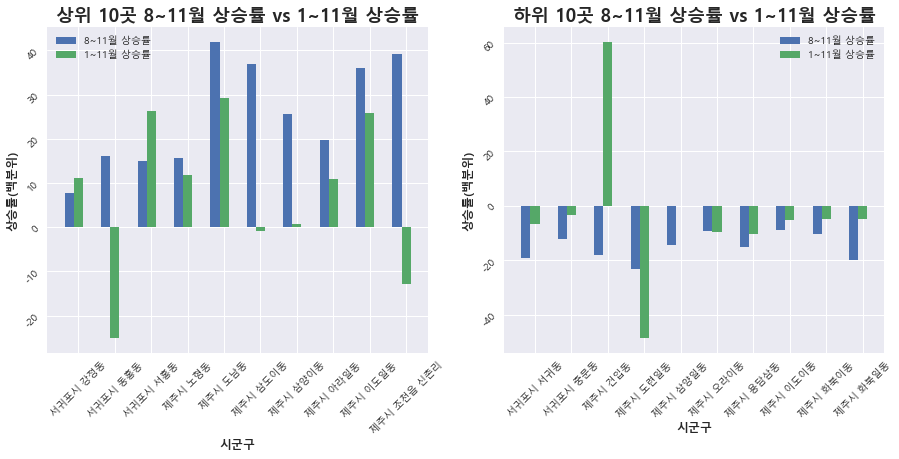

In [81]:
#한글 깨지는걸 방지
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(122, figsize=(15, 6))

# 8~11월 면적당 매매가 상승 상위 10 지역, 1~11월 면적당 매매가 상승률과 비교
ax1 = fig.add_subplot(121)
ax1.bar(df_diff_inc.시군구, df_diff_inc['8~11월_상승률']*100, 0.25)
ax1.bar(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + 0.25, df_diff_inc['1~11월_상승률']*100, 0.25)
ax1.set_xticks(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + 0.25)
ax1.tick_params(labelrotation=45)

ax1.legend(labels = ['8~11월 상승률', '1~11월 상승률'])
ax1.set_ylabel('상승률(백분위)', fontsize=12, fontweight='bold')
ax1.set_xlabel('시군구', fontsize=12, fontweight='bold')
ax1.set_title('상위 10곳 8~11월 상승률 vs 1~11월 상승률', fontsize=18, fontweight = 'bold')

# '20년 04월과 20년 08월 면적별매매평균가 하위 10곳 
ax2 = fig.add_subplot(122)
ax2.bar(df_diff_dec.시군구, df_diff_dec['8~11월_상승률']*100, 0.25)
ax2.bar(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + 0.25, df_diff_dec['1~11월_상승률']*100, 0.25)
ax2.set_xticks(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + 0.25)
ax2.tick_params(labelrotation=45)

ax2.legend(labels = ['8~11월 상승률', '1~11월 상승률'])
ax2.set_ylabel('상승률(백분위)', fontsize=12, fontweight='bold')
ax2.set_xlabel('시군구', fontsize=12, fontweight='bold')
ax2.set_title('하위 10곳 8~11월 상승률 vs 1~11월 상승률', fontsize=18, fontweight = 'bold')

plt.show()

**[\'20.5\~8월 까지의 아파트값 변화는 어느 정도 20.1\~11월 전체의 변화를 대표한다]** 
- 그래프에서도 볼수 있듯, 8\~11월 간 오른 지역은 1\~11월 전체로 보아도 절반 이상이 아파트 값이 올랐고, 이는 내려간 지역도 동일하다.
- 8월부터 11월까지 행복했던 제주의 아파트 주인들은 사실 1월부터 행복했었다고 보아도 될 듯 하다...

### [요약/결론]

### 제주 소비와 부동산의 관계
- _수도권과 비슷하게 '20년 제주시 또한 아파트 값이 상승했고 매매 건수도 함께 성장했다. 하지만 전세 값은 이에 비해 크게 상승하지 않았고, 수요와 공급이 모두 낮아진 것으로 보인다._
- _소비 중심으로 집값을 바라보았을때 높은 집값은 높은 주변 소비를 의미 하지만 그 반대는 아니였다. 오히려 높은 소비지역은 가장 높게 집값이 오른 지역과 가장 낮게 집값이 내린 곳을 모두 포함하고 있다._  
&nbsp;  
- 전세가 줄어들고 매매가 늘어난다는 건 아마도 거주를 위해 아파트를 찾는 사람보다 투자 목적으로 집을 아예 사려는 사람들이 많아진 것이 아닌가 예상해본다. 늘어난 중국인의 토지 매입량이 아마 아파트에서도 중국인의 매매로 이어지지 않았을까 한다.
- 아쉽게도 모든 지표가 그러하듯, 소비는 집값의 당락에 대한 아주 선명한 지표가 되지는 못했다. 하지만 높은 소비는 높은 집값의 필요조건인 것으로 미루어 보았을때, 소비가 높고 아파트 값이 떨어진 지역의 매물을 산다면 오히려 더 투자측면에서 이익 상승 기력이 있는것은 아닌지 예상해본다.



### 긴글 읽어주셔서 감사합니다!